In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
import collections
from array import array

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'
outputdir = inputdir+'xsec_detsys_all_t/' 
output_filedir = outputdir
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')


Welcome to JupyROOT 6.18/04


In [2]:
outputdir_png, outputdir_root, outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"Detector_systematic.root","RECREATE");


In [3]:
#!jupyter nbconvert --to script numuCCana_muon_cut_weight.ipynb

In [4]:
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kFALSE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# CRTinBNB tagger, Overlay or MC

In [5]:
path = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'
f_cv = ROOT.TFile.Open(path+"xsec_detsys_CV_t/xsec_detsys_CV.root", 'read')
f_sce = ROOT.TFile.Open(path+"xsec_detsys_SCE_t/xsec_detsys_dEdx.root", 'read')
f_lydown = ROOT.TFile.Open(path+"xsec_detsys_LYdown_t/xsec_detsys_dEdx.root", 'read')
f_wireanglexz = ROOT.TFile.Open(path+"xsec_detsys_WireAngleXZ_t/xsec_detsys_dEdx.root", 'read')
f_wireangleyz = ROOT.TFile.Open(path+"xsec_detsys_WireAngleYZ_t/xsec_detsys_dEdx.root", 'read')
f_wiremodx = ROOT.TFile.Open(path+"xsec_detsys_WireModX_t/xsec_detsys_dEdx.root", 'read')
f_wiremodyz = ROOT.TFile.Open(path+"xsec_detsys_WireModYZ_t/xsec_detsys_dEdx.root", 'read')

f_lyatt = ROOT.TFile.Open(path+"xsec_detsys_LYAtt_t/xsec_detsys_dEdx.root", 'read')
f_lyray = ROOT.TFile.Open(path+"xsec_detsys_LYRay_t/xsec_detsys_dEdx.root", 'read')

f_dedx = ROOT.TFile.Open(path+"xsec_detsys_dEdx_t/xsec_detsys_dEdx.root", 'read')
f_recomb2 = ROOT.TFile.Open(path+"xsec_detsys_recomb2_t/xsec_detsys_dEdx.root", 'read')


In [6]:
pot_data =     7.644e+18 
def draw_adding():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/25.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/25.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/25.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

def draw_adding_ratio():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/15.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .91,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/15.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim_ratio():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/15.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

In [7]:
def plot_detsys_histo(name):
    #files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray,f_dedx,f_recomb2]
    files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray,f_recomb2]
    #name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh','dEdx', 'recomb2' ]
    name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh', 'recomb2' ]
    h_files = []
    i = 0
    legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
    for x in files:
        h_files.append(x.Get(name))
        h_files[i].SetLineColor(i+1)
        h_files[i].SetLineWidth(4)
        h_files[i].Scale(1.0/0.0638845208392)
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        if (i+1)==10:
            h_files[i].SetLineColor(30)
        legend.AddEntry(h_files[i],name_files[i],"f")
        if i == 0:
            h_files[i].SetMaximum(h_files[i].GetMaximum()*1.5)
            h_files[i].Draw('hist')
            legend.Draw()
        else:
            h_files[i].Draw("hist same")
        i+=1
    h_files[0].Draw("hist same")
    h_files[0].Draw("text same")
    c1.Draw()
    del h_files[:]

    c1.SaveAs(outputdir_png + 'h_'+name+'_WO_Scale.png')
    c1.SaveAs(outputdir_root + 'h_'+name+'_WO_Scale.root')
    c1.SaveAs(outputdir_pdf + 'h_'+name+'_WO_Scale.pdf')
    return

#h_files.clear()

In [8]:

variable_list = ['TrackMom_MCS','TrackMom_range','NuVx_sce','NuVy_sce','NuVz_sce','cosTheta',\
                'TrackLength','PID_chiproton','PIDmupion_ration','PIDmuprot_ration','nr_crthit_top',\
                'CRTVertexcut','TrackScore','NuScore']
for x in variable_list:
    print 'ploting: ', x
    add_name = '_bkg_all'
    #plot_detsys_histo(x+add_name)

ploting:  TrackMom_MCS
ploting:  TrackMom_range
ploting:  NuVx_sce
ploting:  NuVy_sce
ploting:  NuVz_sce
ploting:  cosTheta
ploting:  TrackLength
ploting:  PID_chiproton
ploting:  PIDmupion_ration
ploting:  PIDmuprot_ration
ploting:  nr_crthit_top
ploting:  CRTVertexcut
ploting:  TrackScore
ploting:  NuScore


In [9]:
variable_list = ['TrackMom_MCS','TrackMom_range','NuVx_sce','NuVy_sce','NuVz_sce','cosTheta',\
                'TrackLength','PID_chiproton','PIDmupion_ration','PIDmuprot_ration','nr_crthit_top',\
                'CRTVertexcut','TrackScore','NuScore']
for x in variable_list:
    print 'ploting: ', x
    add_name = '_bkg_pre'
    #plot_detsys_histo(x+add_name)

ploting:  TrackMom_MCS
ploting:  TrackMom_range
ploting:  NuVx_sce
ploting:  NuVy_sce
ploting:  NuVz_sce
ploting:  cosTheta
ploting:  TrackLength
ploting:  PID_chiproton
ploting:  PIDmupion_ration
ploting:  PIDmuprot_ration
ploting:  nr_crthit_top
ploting:  CRTVertexcut
ploting:  TrackScore
ploting:  NuScore


In [10]:
variable_list = ['TrackMom_MCS','TrackMom_range','NuVx_sce','NuVy_sce','NuVz_sce','cosTheta',\
                'TrackLength','PID_chiproton','PIDmupion_ration','PIDmuprot_ration','nr_crthit_top',\
                'CRTVertexcut','TrackScore','NuScore']
for x in variable_list:
    print 'ploting: ', x
    add_name = '_sig_all'
    #plot_detsys_histo(x+add_name)

ploting:  TrackMom_MCS
ploting:  TrackMom_range
ploting:  NuVx_sce
ploting:  NuVy_sce
ploting:  NuVz_sce
ploting:  cosTheta
ploting:  TrackLength
ploting:  PID_chiproton
ploting:  PIDmupion_ration
ploting:  PIDmuprot_ration
ploting:  nr_crthit_top
ploting:  CRTVertexcut
ploting:  TrackScore
ploting:  NuScore


In [11]:
variable_list = ['TrackMom_MCS','TrackMom_range','NuVx_sce','NuVy_sce','NuVz_sce','cosTheta',\
                'TrackLength','PID_chiproton','PIDmupion_ration','PIDmuprot_ration','nr_crthit_top',\
                'CRTVertexcut','TrackScore','NuScore']
for x in variable_list:
    print 'ploting: ', x
    add_name = '_sig_pre'
    #plot_detsys_histo(x+add_name)

ploting:  TrackMom_MCS
ploting:  TrackMom_range
ploting:  NuVx_sce
ploting:  NuVy_sce
ploting:  NuVz_sce
ploting:  cosTheta
ploting:  TrackLength
ploting:  PID_chiproton
ploting:  PIDmupion_ration
ploting:  PIDmuprot_ration
ploting:  nr_crthit_top
ploting:  CRTVertexcut
ploting:  TrackScore
ploting:  NuScore


Name: /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_CV_t/xsec_detsys_CV.root Title: 
Name: /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_SCE_t/xsec_detsys_dEdx.root Title: 
Name: /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_LYdown_t/xsec_detsys_dEdx.root Title: 
Name: /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireAngleXZ_t/xsec_detsys_dEdx.root Title: 
Name: /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireAngleYZ_t/xsec_detsys_dEdx.root Title: 
Name: /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_t/xsec_detsys_dEdx.root Title: 
Name: /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModYZ_t/xsec_detsys_dEdx.root Title: 
Name: /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_LYAtt_t/xsec_detsys_dEdx.root Title: 
Nam

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/png/h_xsec_detsys_all.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/root/h_xsec_detsys_all.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/pdf/h_xsec_detsys_all.pdf has been created


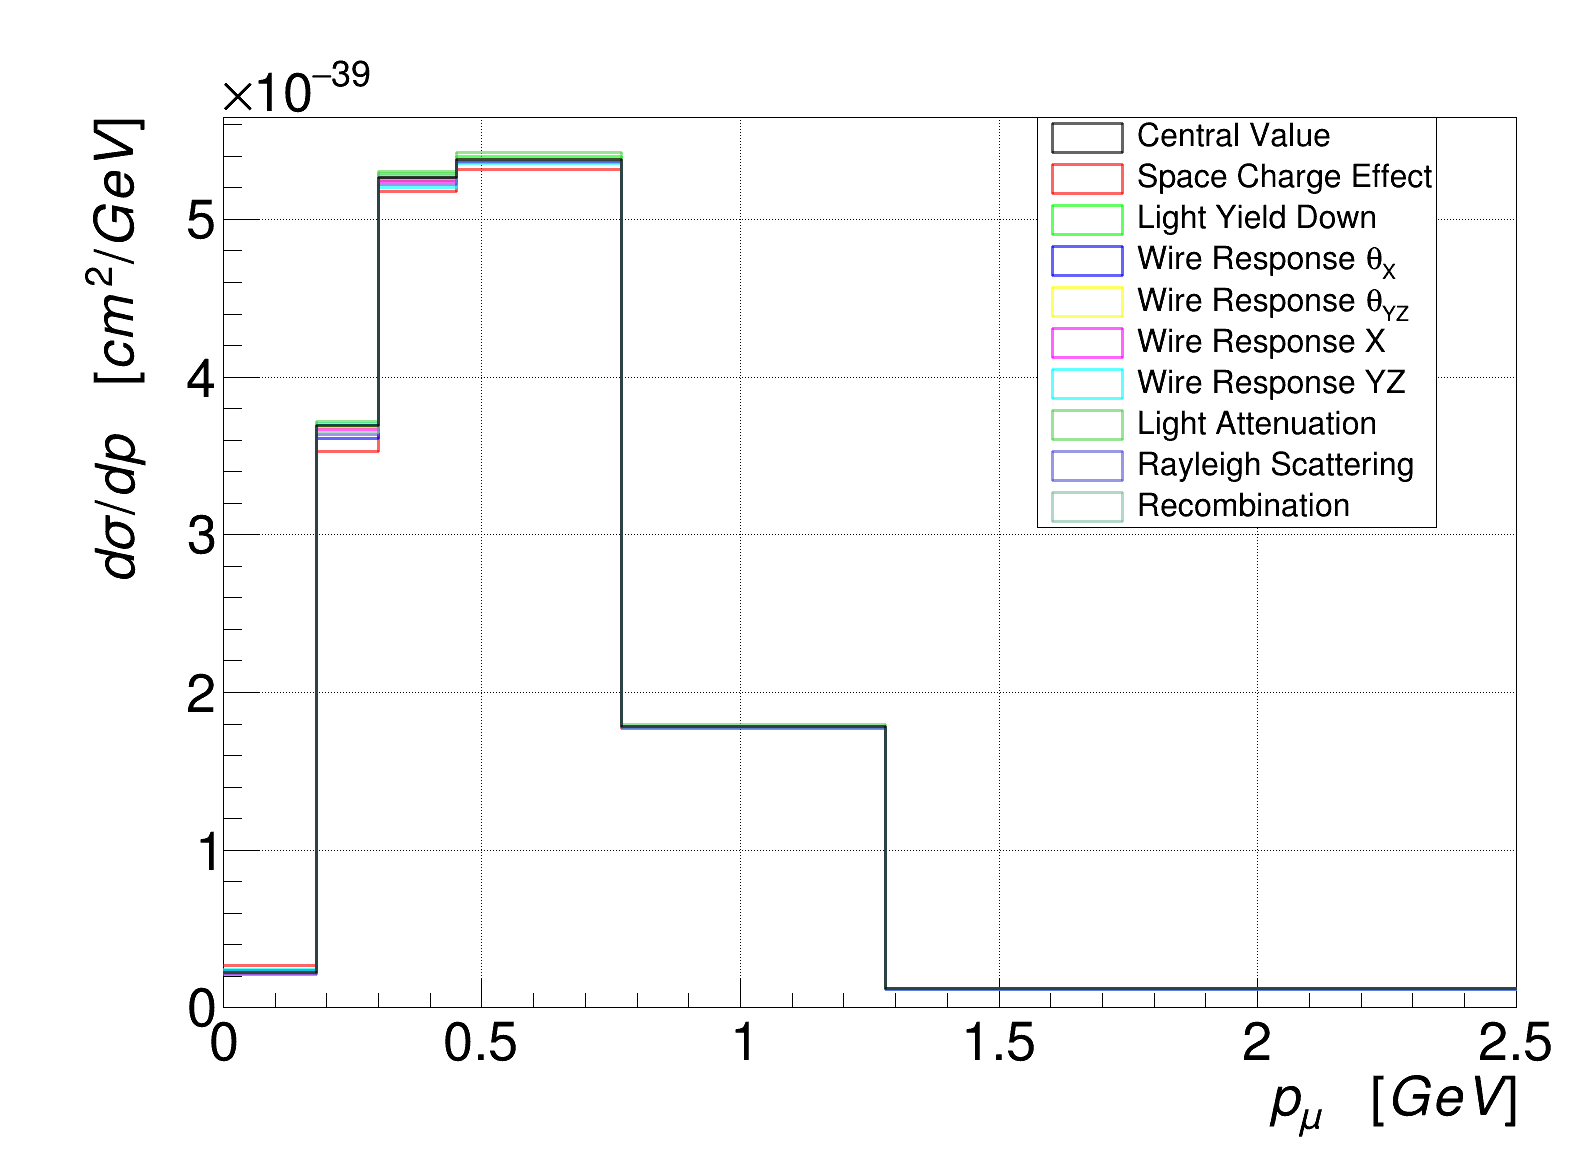

In [12]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray,f_dedx,f_recomb2]
files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray,f_recomb2]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh','dEdx', 'recomb2' ]
#name_files = ['Central Value','Space Charge Effect','Light Yield Down','Wire Response #theta_{X}','Wire Response #theta_{YZ}','Wire Response X','Wire Response YZ','Light Attenuation','Rayleigh Scattering','dEdx','Recombination']
name_files = ['Central Value','Space Charge Effect','Light Yield Down','Wire Response #theta_{X}','Wire Response #theta_{YZ}','Wire Response X','Wire Response YZ','Light Attenuation','Rayleigh Scattering','Recombination']

h_files = []
i = 0
legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
for x in files:
    print x
    h_files.append(x.Get('h_xsec_data'))
    h_files[i].SetLineColorAlpha(i+1,0.6)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.6)
    legend.AddEntry(h_files[i],name_files[i],"f")
    if i == 0:
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        h_files[i].Draw('hist')
    else:
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        h_files[i].Draw("hist same")
    i+=1
h_files[0].Draw("hist same")
legend.Draw()
c1.Draw()
del h_files[:]

c1.SaveAs(outputdir_png + "h_xsec_detsys_all.png")
c1.SaveAs(outputdir_root + "h_xsec_detsys_all.root")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_all.pdf")

#h_files.clear()

In [13]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray,f_dedx,f_recomb2]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh','dEdx', 'recomb2' ]
num_file = 11
h_files = []
i = 0
legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
for x in files:
    h_files.append(x.Get('h_xsec_data'))
num_bins = h_files[0].GetNbinsX()

xsec_diff_matrix = np.zeros((num_bins))

xsec_cov_matrix = np.zeros((num_bins,num_bins))

for f in range(1,num_file-1):
    xsec_diff_matrix = np.zeros((num_bins))
    print name_files[f]
    for b in range(num_bins):
        xsec_diff_matrix[b]= (h_files[0].GetBinContent(b+1)-h_files[f].GetBinContent(b+1) )/(h_files[0].GetBinContent(b+1) + 1e-100)
    #print np.matmul(xsec_diff_matrix,np.transpose(xsec_diff_matrix))
    xsec_cov_matrix = xsec_cov_matrix + xsec_diff_matrix.reshape(num_bins,1) * xsec_diff_matrix
np.save(output_filedir+'frac_covariance_detsys',xsec_cov_matrix)

Space Charge Effect
Light Yield Down
Wire Response #theta_{X}
Wire Response #theta_{YZ}
Wire Response X
Wire Response YZ
Light Attenuation
Rayleigh Scattering
Recombination


In [14]:
RootFile = ROOT.TFile(output_filedir+"Detector_systematic.root","RECREATE");

603

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/png/h_frac_covariance_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/root/h_frac_covariance_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/pdf/h_frac_covariance_detsys.pdf has been created


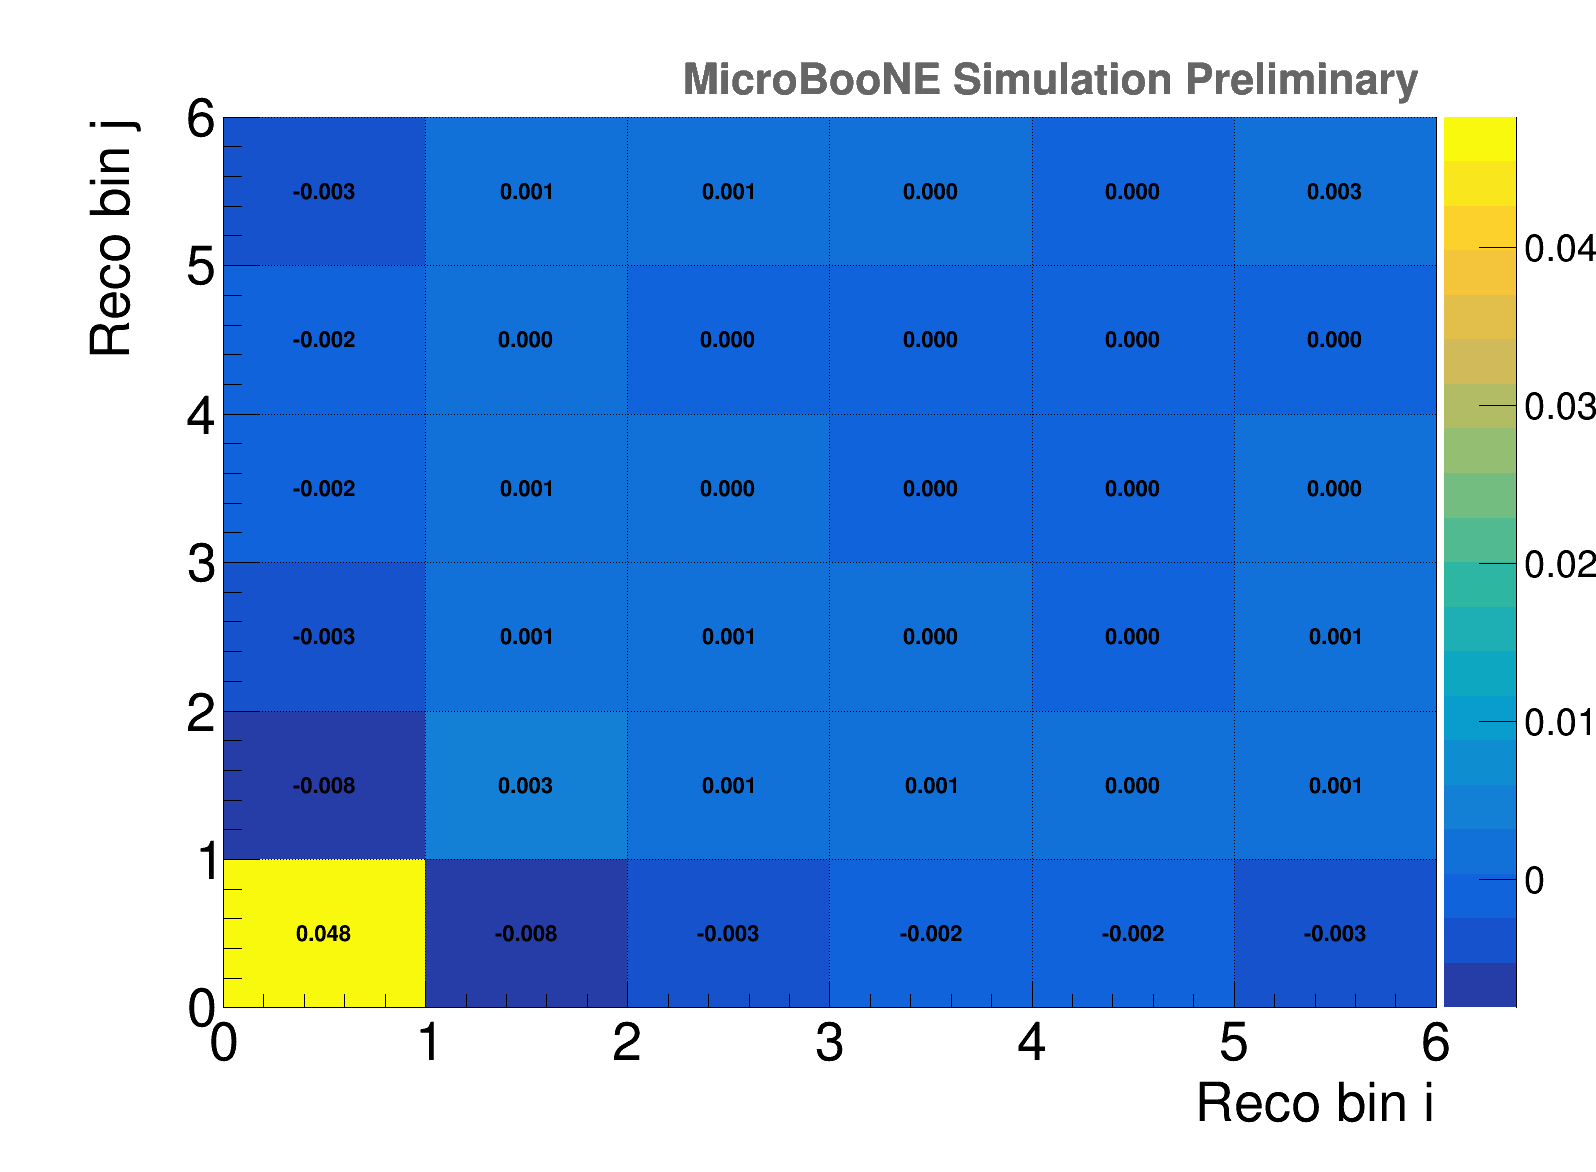

In [15]:
ROOT.gStyle.SetPaintTextFormat('0.6f')
h_covariance = ROOT.TH2F("h_covariance",'Covariance matrix',6,0,6,6,0,6)
for i in range(num_bins):
    for j in range(num_bins):
        h_covariance.SetBinContent(i+1,j+1,xsec_cov_matrix[i,j])
h_covariance.SetXTitle("Reco bin i")
h_covariance.SetYTitle("Reco bin j")
h_covariance.GetYaxis().SetTitleSize(0.05)
h_covariance.GetYaxis().SetTitleOffset(0.0)
h_covariance.GetYaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleSize(0.05)
h_covariance.GetXaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleOffset(1)
h_covariance.SetLineColor(ROOT.kBlack)
h_covariance.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')
h_covariance.Draw('colz')
c1.SetLogz(0)
h_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_frac_covariance_detsys.png")
c1.SaveAs(outputdir_root + "h_frac_covariance_detsys.root")
c1.SaveAs(outputdir_pdf + "h_frac_covariance_detsys.pdf")
h_covariance.Write('h_frac_covariance')

In [16]:
quad_sum = 0.1
for i in range(num_bins):
    quad_sum = quad_sum+xsec_cov_matrix[i,i]
    print i, ' - ', xsec_cov_matrix[i,i], ' sqrt: ', math.sqrt(xsec_cov_matrix[i,i])
    
print 'Qad sum: ', quad_sum,' sqrt: ', math.sqrt(quad_sum)
print 'Qad sum: ', quad_sum/num_bins,' sqrt: ', math.sqrt(quad_sum/num_bins)
    

0  -  0.04826026172851808  sqrt:  0.219682183457
1  -  0.003118709469191178  sqrt:  0.0558454068764
2  -  0.0006254491862224863  sqrt:  0.0250089821109
3  -  0.00026143986060233443  sqrt:  0.0161691020345
4  -  0.00012515793722047233  sqrt:  0.0111874008251
5  -  0.0028734011052124844  sqrt:  0.0536041146295
Qad sum:  0.15526441928696705  sqrt:  0.394036063435
Qad sum:  0.02587740321449451  sqrt:  0.160864549278


In [17]:
quad_sum = 0.0
for f in range(1,num_file-1):
    for b in range(1):
        err = h_files[0].GetBinContent(b+1)-h_files[f].GetBinContent(b+1)
        print err, err/h_files[0].GetBinContent(b+1)
        quad_sum = quad_sum + err*err
print quad_sum , quad_sum/h_files[0].GetBinContent(1)/h_files[0].GetBinContent(1)
print math.sqrt(quad_sum), math.sqrt(quad_sum)/h_files[0].GetBinContent(1)
print h_files[0].GetBinContent(1)

-4.04891178282e-41 -0.179335513943
-1.16223694631e-41 -0.051478118386
-1.38336184398e-41 -0.0612722431525
2.96654884898e-42 0.0131395197279
5.32493416443e-42 0.0235853448115
-1.51102013408e-41 -0.0669265192376
1.90016071762e-42 0.00841624409591
1.49714727928e-41 0.0663120589385
-9.72501134241e-43 -0.00430742876295
2.45999202087e-81 0.0482602617285
4.95983066331e-41 0.219682183457
2.25773004677e-40


In [18]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ' ,'LYAttenuation', 'LYRayleigh' ]
#num_file = 7
h_files = []
i = 0
legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
for x in files:
    h_files.append(x.Get('h_xsec_data'))
num_bins = h_files[0].GetNbinsX()
xsec_diff_matrix = np.zeros((num_bins))
xsec_cov_matrix = np.zeros((num_bins,num_bins))
for f in range(1,num_file-1):
    xsec_diff_matrix = np.zeros((num_bins))
    for b in range(num_bins):
        xsec_diff_matrix[b]= (h_files[0].GetBinContent(b+1)-h_files[f].GetBinContent(b+1) )
    #print np.matmul(xsec_diff_matrix,np.transpose(xsec_diff_matrix))
    xsec_cov_matrix = xsec_cov_matrix + xsec_diff_matrix.reshape(num_bins,1) * xsec_diff_matrix
    
xsec_corr_matrix = np.zeros((num_bins,num_bins))
for i in range(num_bins):
    for j in range(num_bins):
        xsec_corr_matrix[i][j] = xsec_cov_matrix[i][j]/(math.sqrt(xsec_cov_matrix[i][i]*xsec_cov_matrix[j][j]))

np.save(output_filedir+'correlation_detsys',xsec_corr_matrix)
np.save(output_filedir+'covariance_detsys',xsec_cov_matrix)

679

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/png/h_correlation_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/root/h_correlation_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/pdf/h_correlation_detsys.pdf has been created


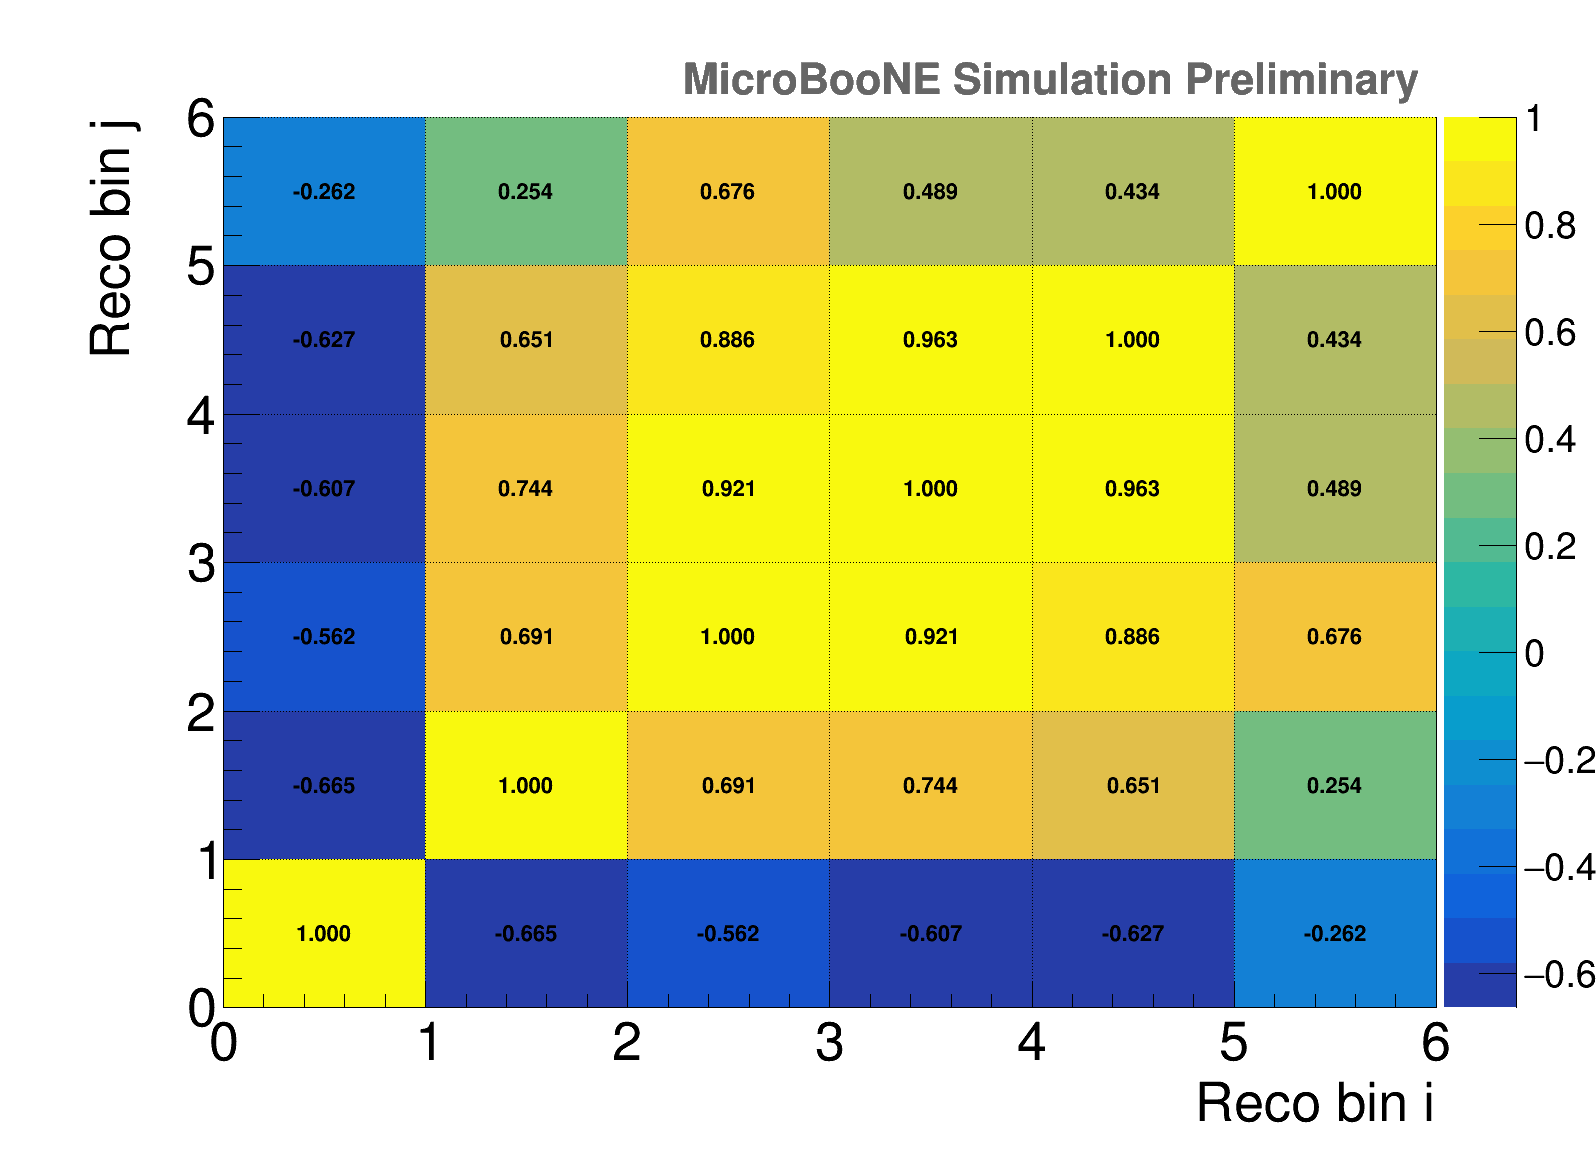

In [19]:
ROOT.gStyle.SetPaintTextFormat('0.3f')
h_correlation = ROOT.TH2D("h_correlation",'Correlation matrix',6,0,6,6,0,6)
for i in range(num_bins):
    for j in range(num_bins):
        h_correlation.SetBinContent(i+1,j+1,xsec_corr_matrix[i,j])
#h_covariance.SetXTitle("Reco bin i, 7=overflow")
#h_covariance.SetYTitle("True bin j")
h_correlation.SetXTitle("Reco bin i")
h_correlation.SetYTitle("Reco bin j")

h_correlation.GetYaxis().SetTitleSize(0.05)
h_correlation.GetYaxis().SetTitleOffset(0.0)
h_correlation.GetYaxis().SetLabelSize(0.05)
h_correlation.GetXaxis().SetTitleSize(0.05)
h_correlation.GetXaxis().SetLabelSize(0.05)
h_correlation.GetXaxis().SetTitleOffset(1)
h_correlation.SetLineColor(ROOT.kBlack)
h_correlation.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')

#h_correlation.SetMinimum(-1)
h_correlation.Draw('colz')
h_correlation.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_correlation_detsys.png")
c1.SaveAs(outputdir_root + "h_correlation_detsys.root")
c1.SaveAs(outputdir_pdf + "h_correlation_detsys.pdf")
h_correlation.Write('h_correlation')

665

Warning in <TFile::Append>: Replacing existing TH1: h_covariance (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/png/h_covariance_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/root/h_covariance_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/pdf/h_covariance_detsys.pdf has been created


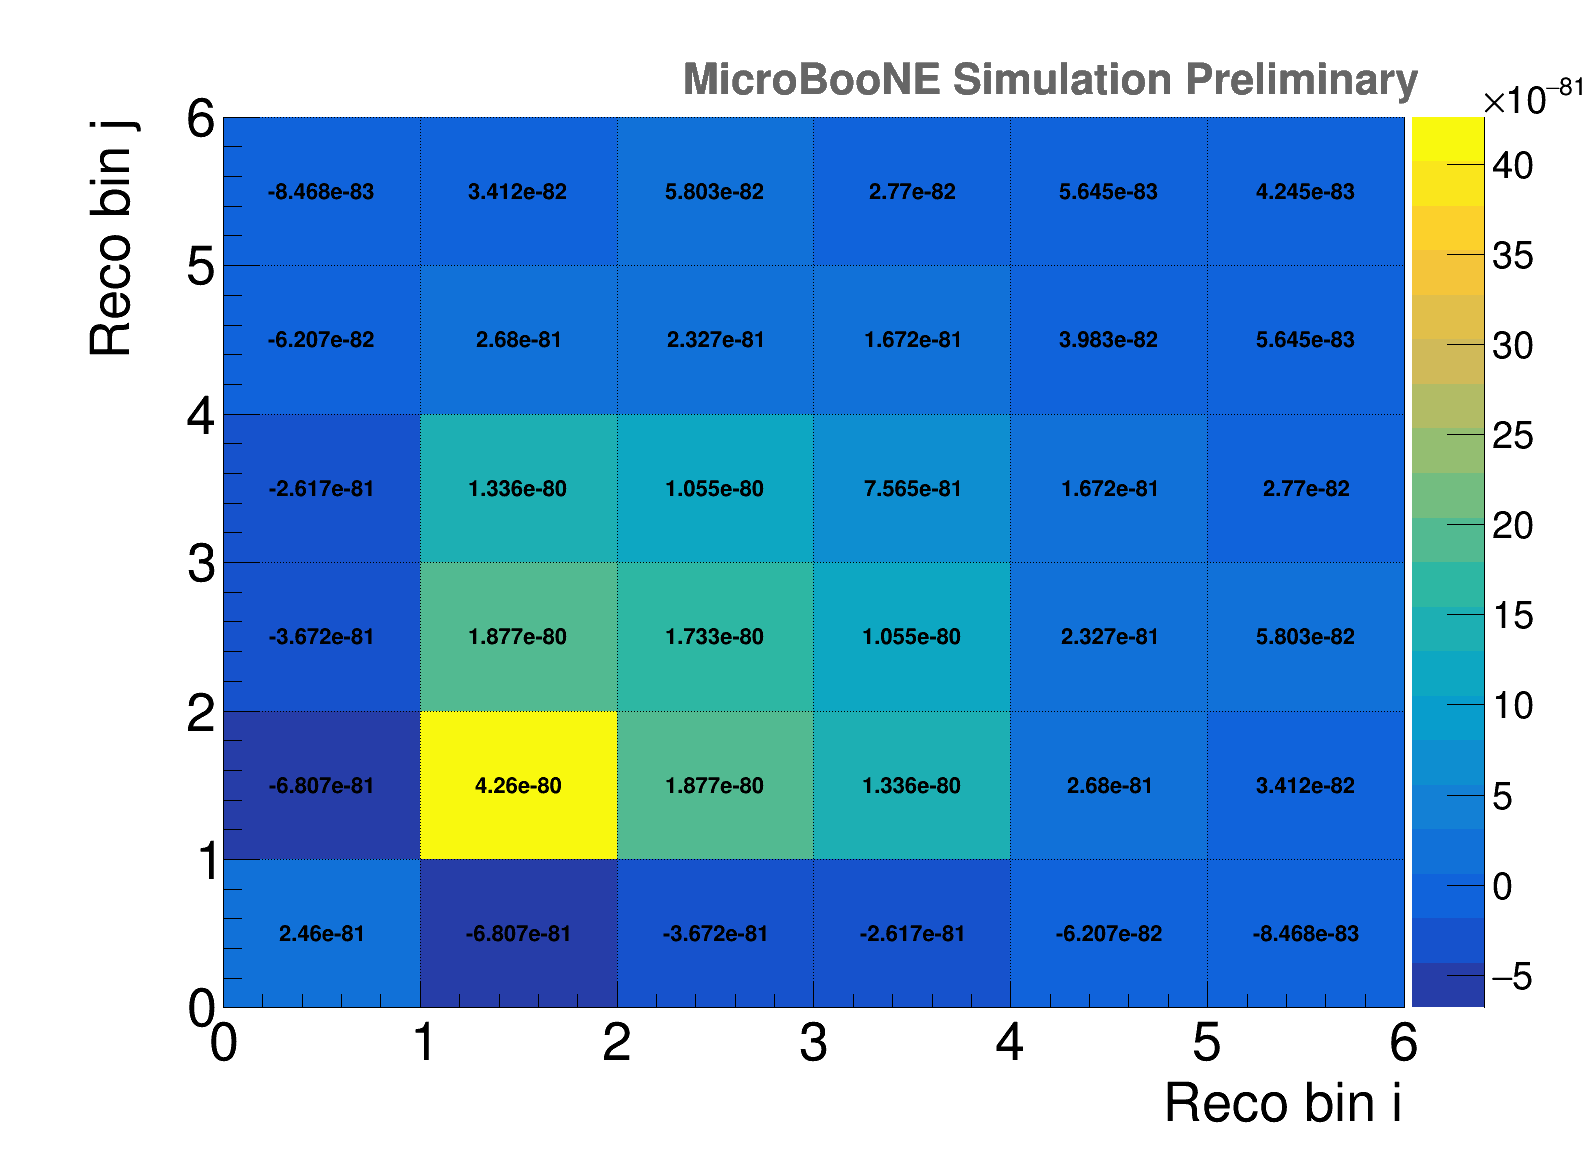

In [20]:
ROOT.gStyle.SetPaintTextFormat('0.6g')
h_covariance = ROOT.TH2D("h_covariance",'Covariance matrix',6,0,6,6,0,6)
for i in range(num_bins):
    for j in range(num_bins):
        h_covariance.SetBinContent(i+1,j+1,xsec_cov_matrix[i,j])
#h_covariance.SetXTitle("Reco bin i, 7=overflow")
#h_covariance.SetYTitle("True bin j")
h_covariance.SetXTitle("Reco bin i")
h_covariance.SetYTitle("Reco bin j")

h_covariance.GetYaxis().SetTitleSize(0.05)
h_covariance.GetYaxis().SetTitleOffset(0.0)
h_covariance.GetYaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleSize(0.05)
h_covariance.GetXaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleOffset(1)
h_covariance.SetLineColor(ROOT.kBlack)
h_covariance.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat('0.4g')

h_covariance.Draw('colz')
h_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_covariance_detsys.png")
c1.SaveAs(outputdir_root + "h_covariance_detsys.root")
c1.SaveAs(outputdir_pdf + "h_covariance_detsys.pdf")
h_covariance.Write('h_covariance')

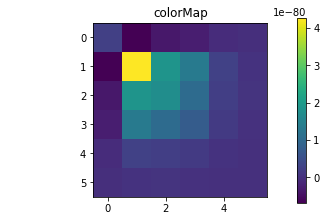

In [21]:
fig = plt.figure(figsize=(6, 3.2))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(xsec_cov_matrix)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show() 

In [22]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/png/h_eff_tilde_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/root/h_eff_tilde_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/pdf/h_eff_tilde_detsys.pdf has been created


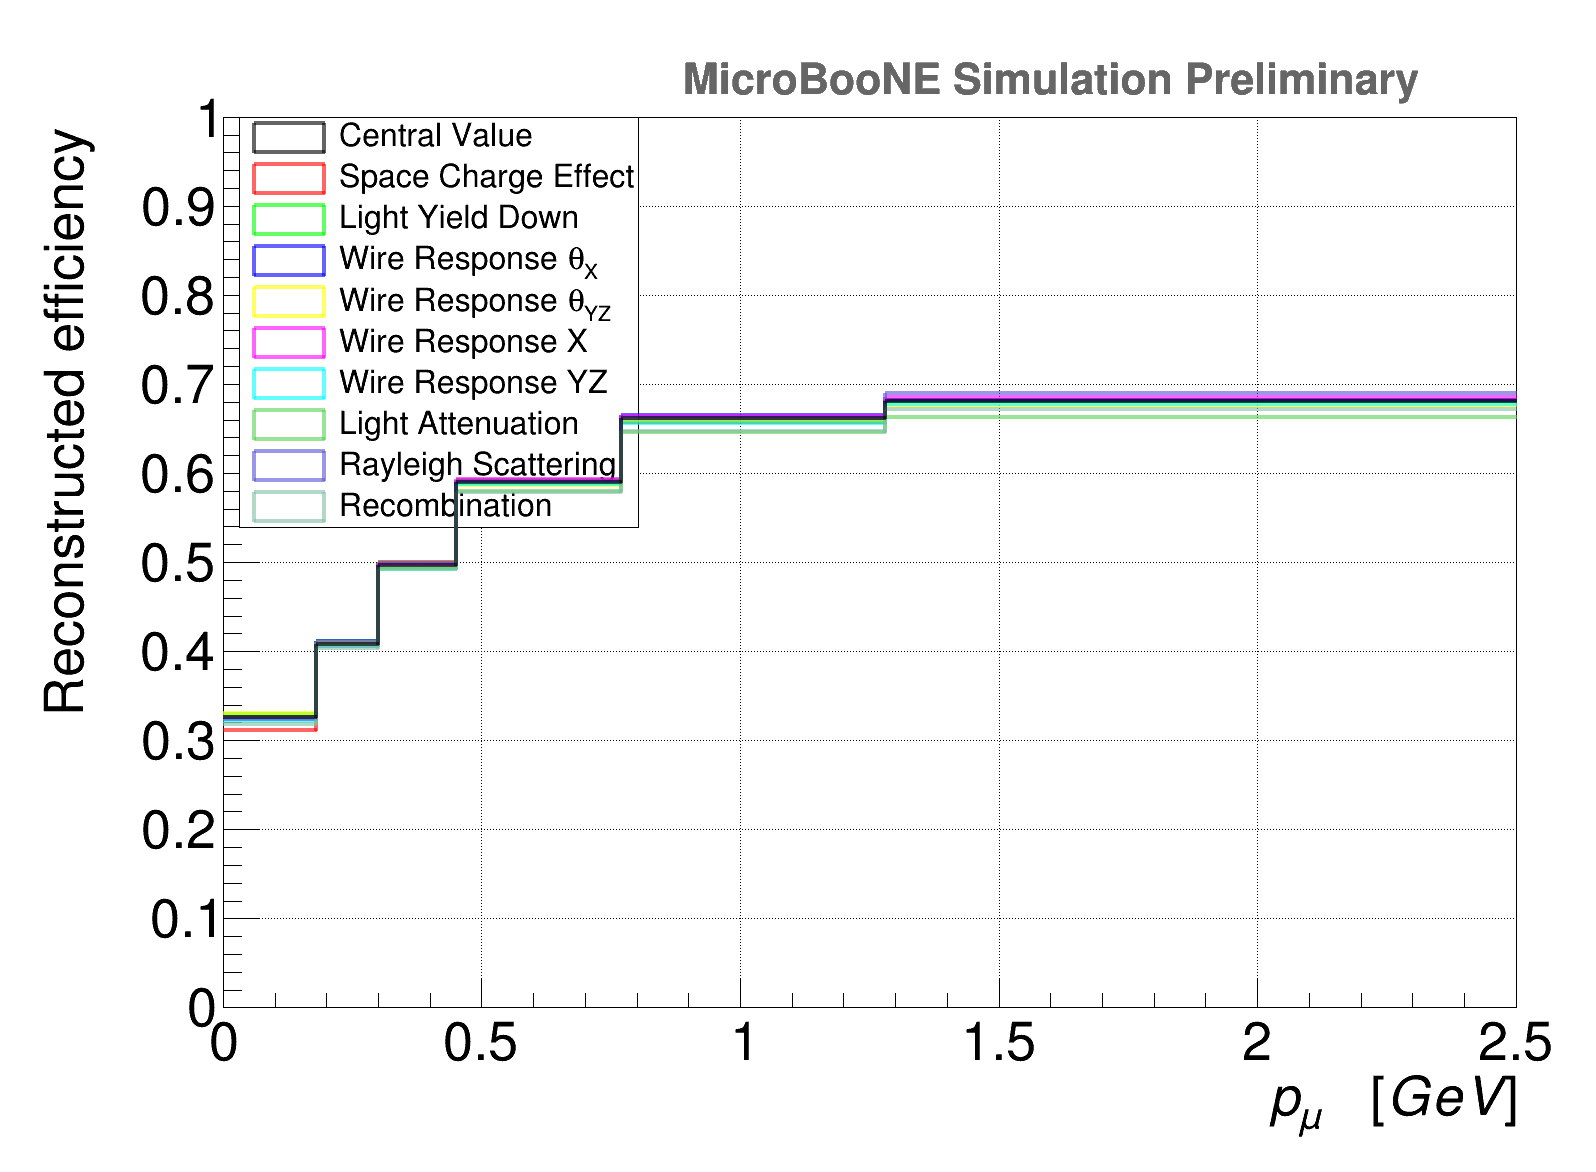

In [23]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
del h_files[:]
h_files = []
i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.55,0.4,0.9) # LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_eff_tilde'))
    h_files[i].SetLineColorAlpha(i+1,0.6)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.6)
    legend.AddEntry(h_files[i],name_files[i],"f")
    if i == 0:
        h_files[i].SetYTitle("Reconstructed efficiency")
        h_files[i].SetXTitle("p_{\mu} \t [GeV]")
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        legend.Draw()
    else:
        h_files[i].SetYTitle("Reconstructed efficiency")
        h_files[i].SetXTitle("p_{\mu} \t [GeV]")
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw("hist same")
    i+=1
h_files[0].Draw("hist same")
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_tilde_detsys.png")
c1.SaveAs(outputdir_root + "h_eff_tilde_detsys.root")
c1.SaveAs(outputdir_pdf + "h_eff_tilde_detsys.pdf")

In [24]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/png/h_eff_true_detsys.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/pdf/h_eff_true_detsys.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/root/h_eff_true_detsys.root has been created


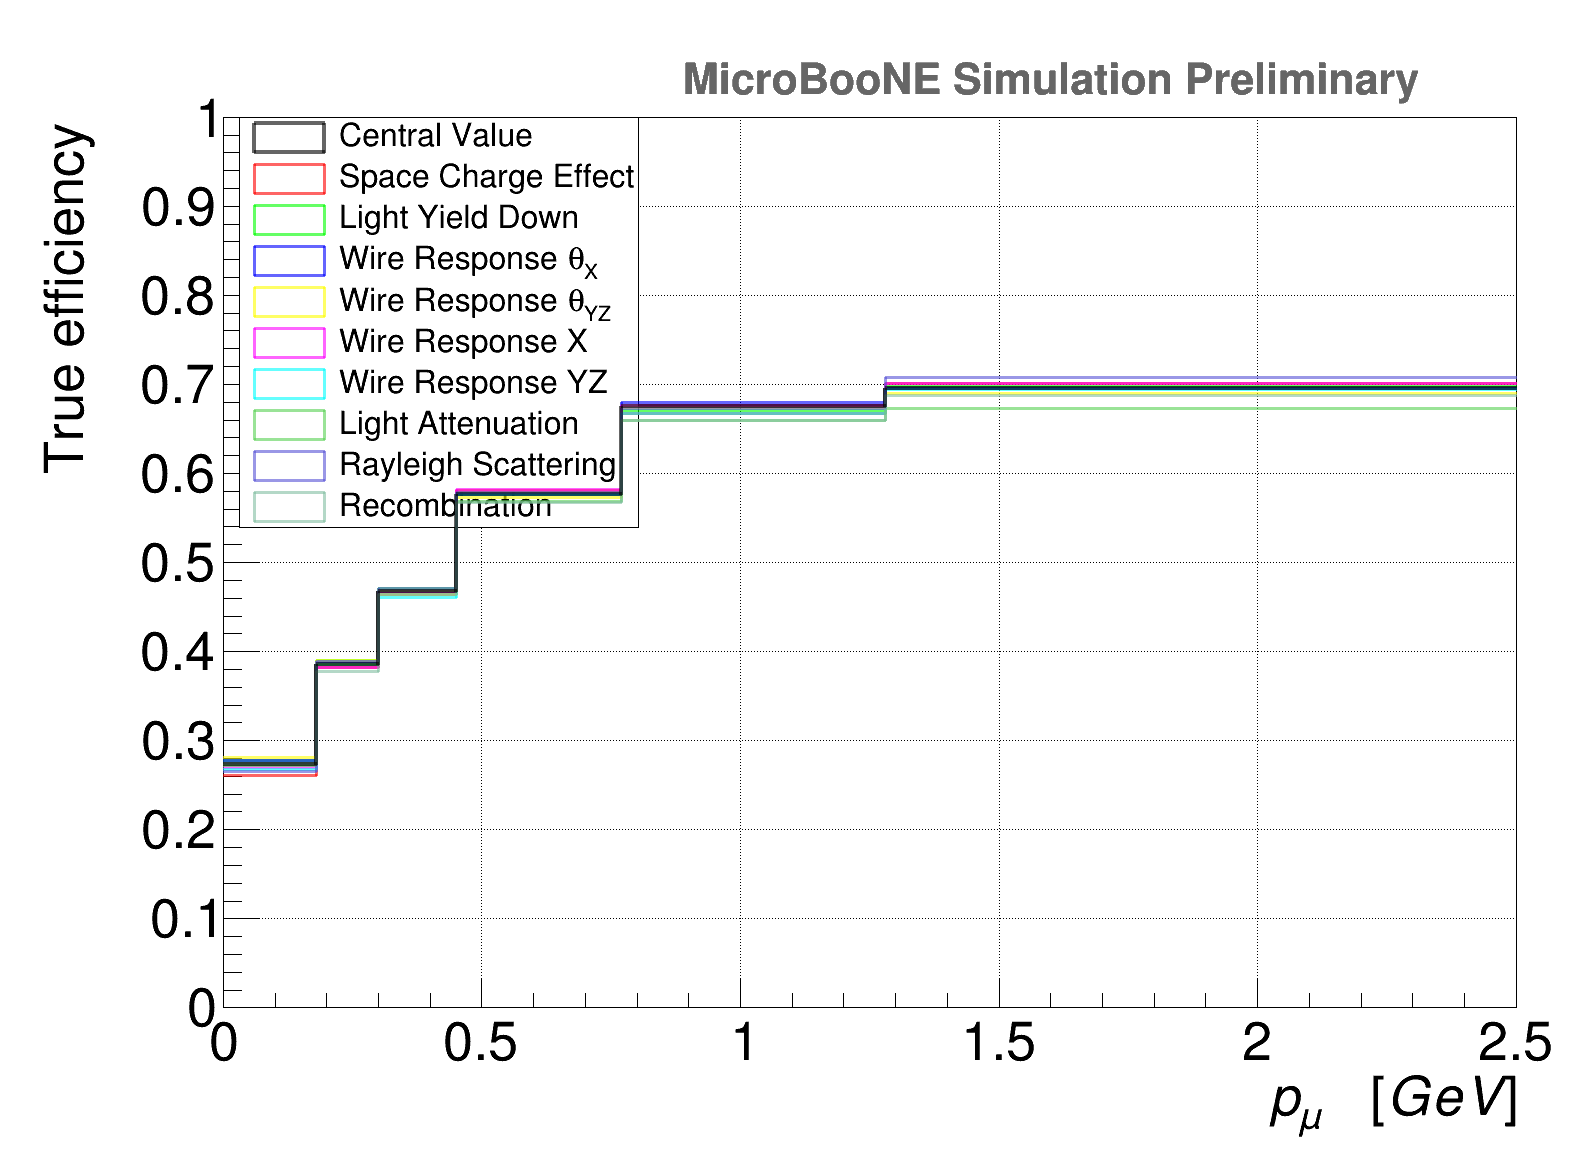

In [25]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
#del h_files_z[:]
#del h_files_n[:]
del h_files[:]
h_files_z = []
h_files_n = []
h_files = []

i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.55,0.4,0.9) # LEGEND LEFT
for x in files:
    h_files_z.append(x.Get('h_eff_true_energy_z'))
    h_files_n.append(x.Get('h_eff_true_energy_n'))
    h_files.append(h_files_z[i])
    h_files[i].Divide(h_files_n[i])
    h_files[i].SetLineColorAlpha(i+1,0.6)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.6)
    h_files[i].SetLineWidth(3)
    h_files[i].SetMaximum(1)
    h_files[i].SetMinimum(0)
    legend.AddEntry(h_files[i],name_files[i],"f")
    if i == 0:
        h_files[i].SetYTitle("True efficiency")
        h_files[i].SetXTitle("p_{\mu} \t [GeV]")
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
        h_files[i].SetYTitle("Reconstructed efficiency")
        h_files[i].SetXTitle("p_{\mu} \t [GeV]")
    i+=1
h_files[0].Draw("hist same")
#legend.Draw()
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_true_detsys.png")
c1.SaveAs(outputdir_pdf + "h_eff_true_detsys.pdf")
c1.SaveAs(outputdir_root + "h_eff_true_detsys.root")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/png/h_eff_both_detsys.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/pdf/h_eff_both_detsys.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/root/h_eff_both_detsys.root has been created


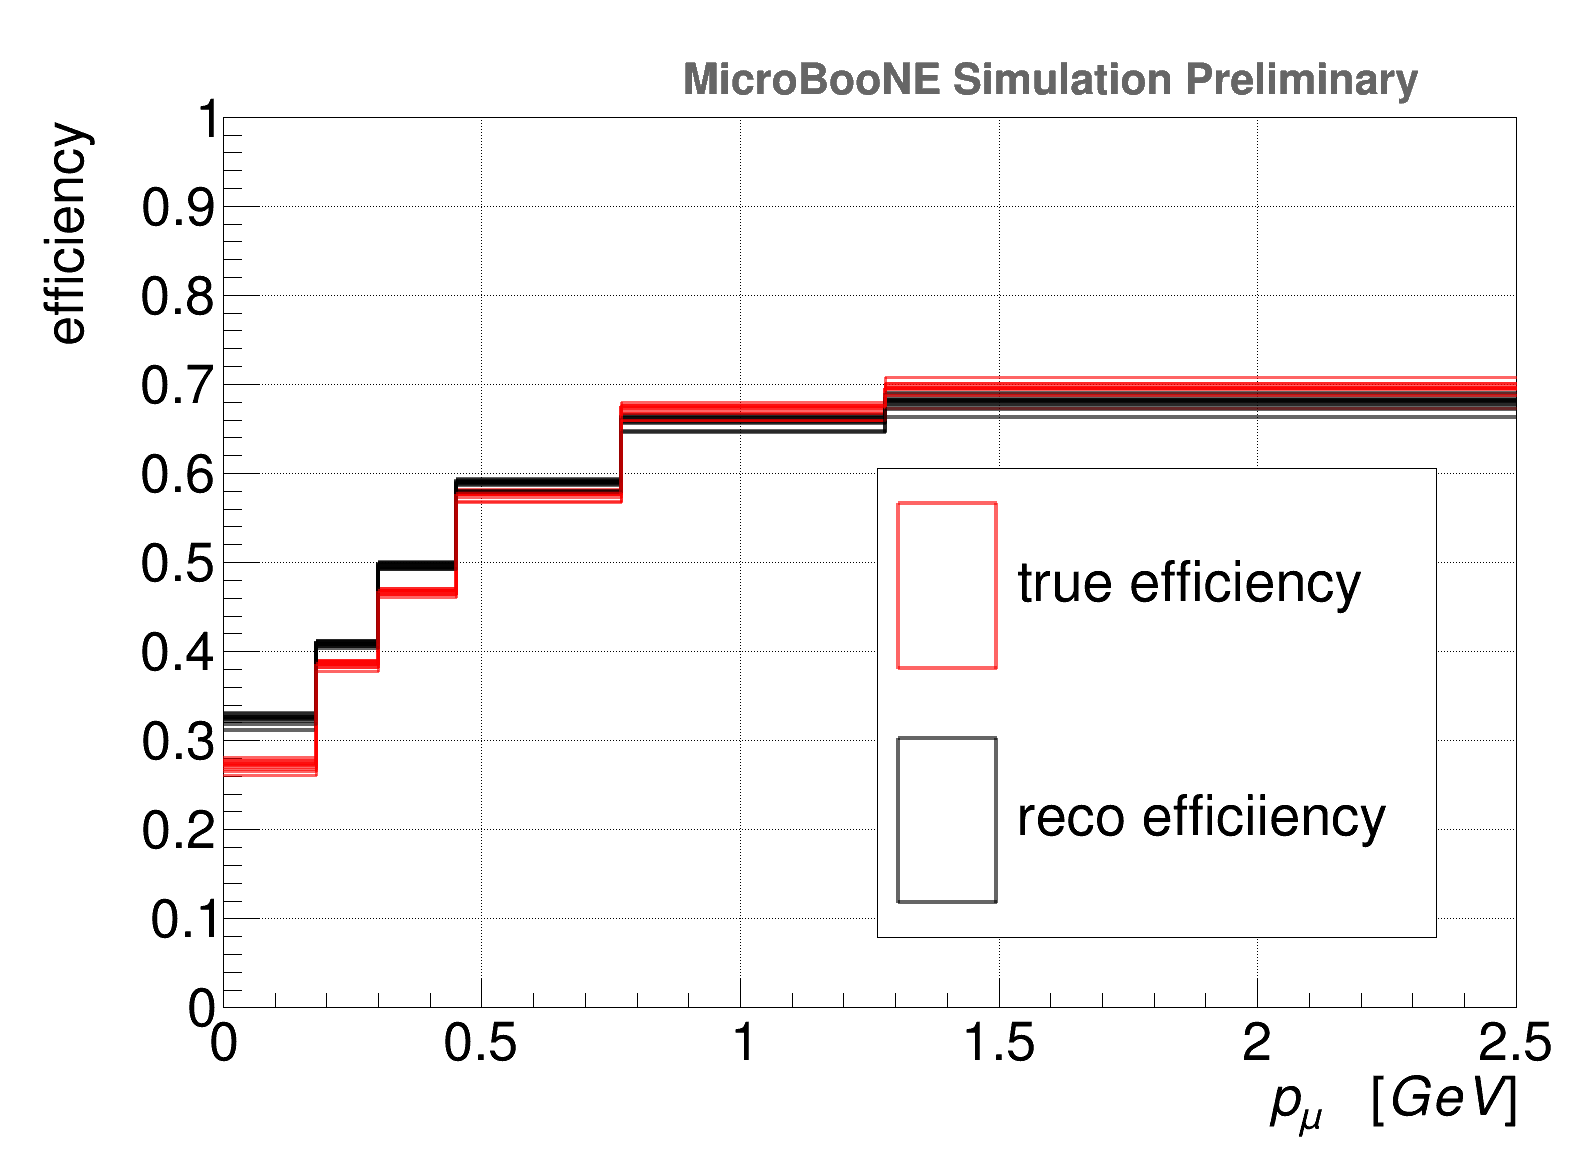

In [26]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
#del h_files_z[:]
#del h_files_n[:]
del h_files[:]
h_files_z = []
h_files_n = []
h_files = []
h_files_tilde = []

i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.55,0.2,0.9,0.6) # LEGEND LEFT
for x in files:
    h_files_z.append(x.Get('h_eff_true_energy_z'))
    h_files_n.append(x.Get('h_eff_true_energy_n'))
    h_files_tilde.append(x.Get('h_eff_tilde'))
    h_files.append(h_files_z[i])
    h_files[i].Divide(h_files_n[i])
    h_files[i].SetLineColorAlpha(ROOT.kRed,0.6)
    h_files_tilde[i].SetLineColorAlpha(ROOT.kBlack,0.6)
    #if (i+1)==10:
    #    h_files[i].SetLineColorAlpha(30,0.6)
    #    h_files_tilde[i].SetLineColorAlpha(30,0.6)
    h_files[i].SetLineWidth(3)
    h_files[i].SetMaximum(1)
    h_files[i].SetMinimum(0)
    #legend.AddEntry(h_files[i],name_files[i],"f")
    if i == 0:
        h_files[i].SetYTitle("efficiency")
        h_files[i].SetXTitle("p_{\mu} \t [GeV]")
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        h_files_tilde[i].Draw('hist same')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
        h_files_tilde[i].Draw('hist same')
        h_files[i].SetYTitle("Reconstructed efficiency")
        h_files[i].SetXTitle("p_{\mu} \t [GeV]")
    i+=1
legend.AddEntry(h_files[0],'true efficiency',"f")
legend.AddEntry(h_files_tilde[0],'reco efficiiency',"f")
h_files[0].Draw("hist same")
#legend.Draw()
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_both_detsys.png")
c1.SaveAs(outputdir_pdf + "h_eff_both_detsys.pdf")
c1.SaveAs(outputdir_root + "h_eff_both_detsys.root")

In [27]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/png/h_overlay_detsys.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/pdf/h_overlay_detsys.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/root/h_overlay_detsys.root has been created


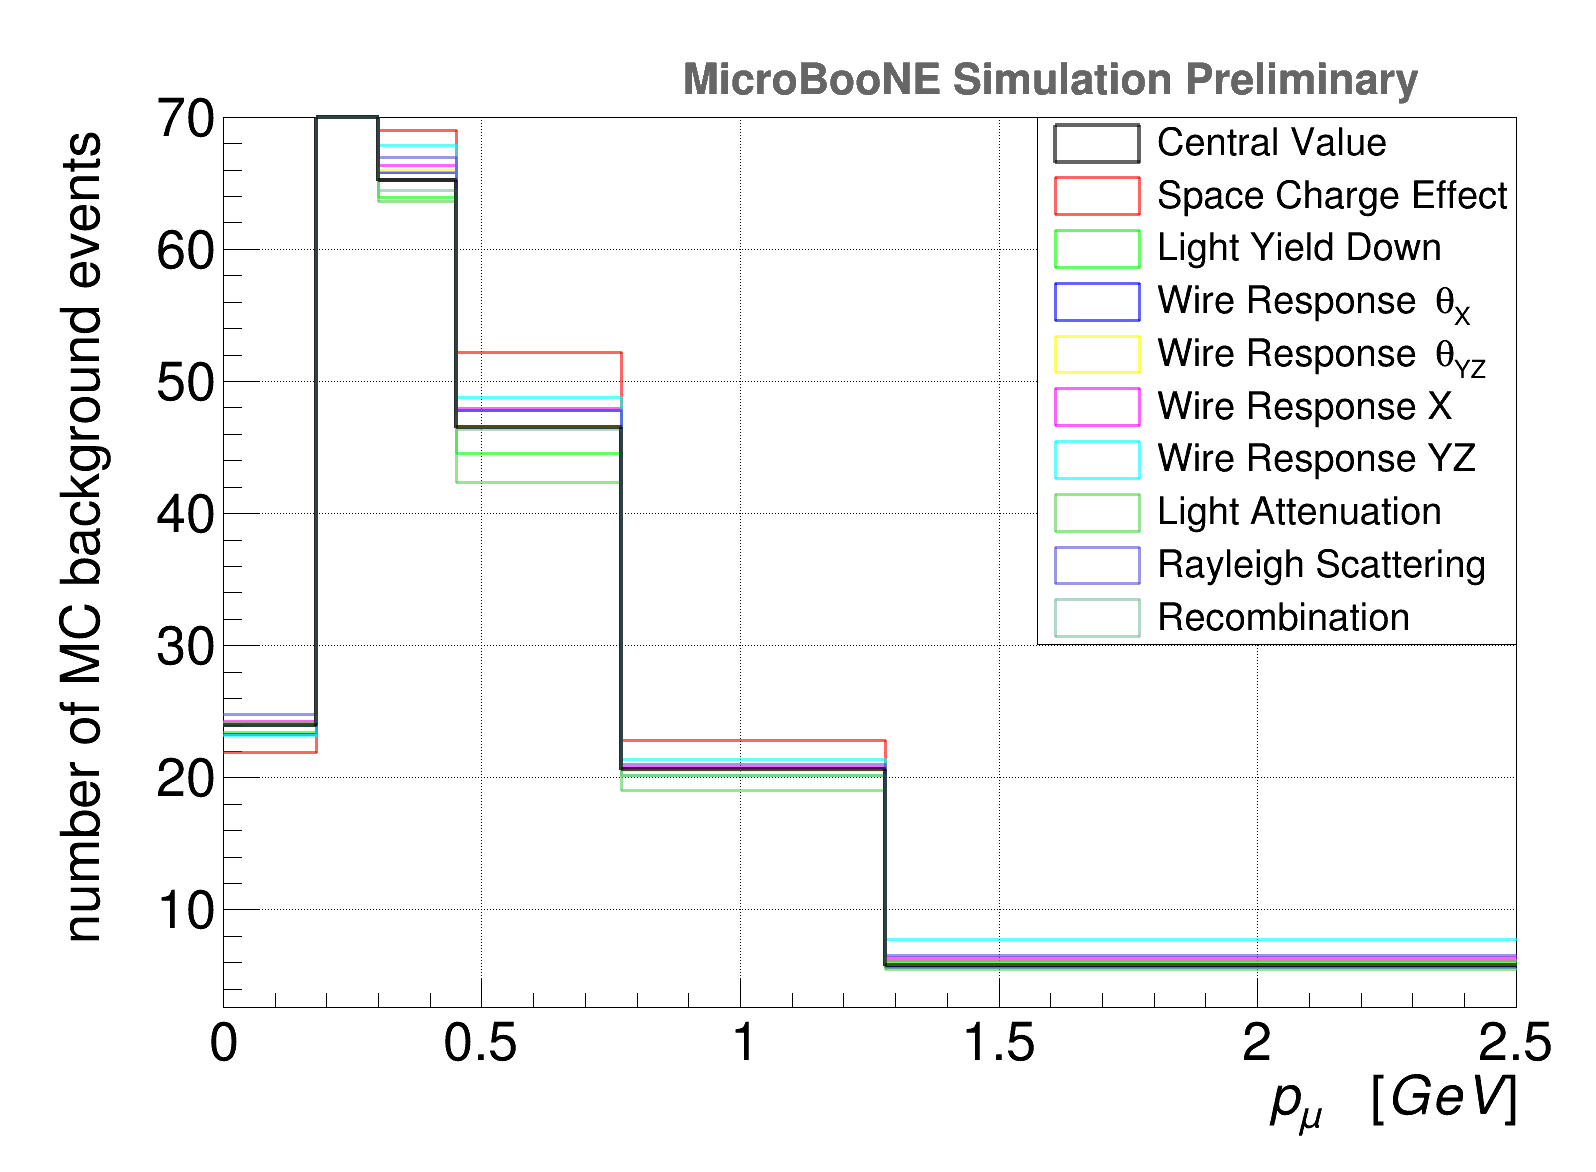

In [28]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
del h_files[:]
h_files = []
i = 0
legend = ROOT.TLegend(0.65,0.45,0.95,0.9); #LEGEND RIGHT
#legend = ROOT.TLegend(0.15,0.65,0.3,0.9) # LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_overlay'))
    h_files[i].SetLineColorAlpha(i+1,0.6)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.6)
    h_files[i].SetLineWidth(3)
    #h_files[i].SetMaximum(1)
    #h_files[i].SetMinimum(0)
    legend.AddEntry(h_files[i],name_files[i],"f")
    if i == 0:
        h_files[i].SetMaximum(70)
        h_files[i].SetYTitle("number of MC background events")
        h_files[i].SetXTitle("p_{\mu} \t [GeV]")
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        legend.Draw()
    else:
        h_files[i].SetMaximum(70)
        h_files[i].Draw("hist same")
        h_files[i].SetYTitle("number of MC background events")
        h_files[i].SetXTitle("p_{\mu} \t [GeV]")
    i+=1
h_files[0].Draw("hist same")
#legend.Draw()
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_overlay_detsys.png")
c1.SaveAs(outputdir_pdf + "h_overlay_detsys.pdf")
c1.SaveAs(outputdir_root + "h_overlay_detsys.root")

In [29]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/png/h_xsec_detsys_all_det.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/pdf/h_xsec_detsys_all_det.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/root/h_xsec_detsys_all_det.root has been created


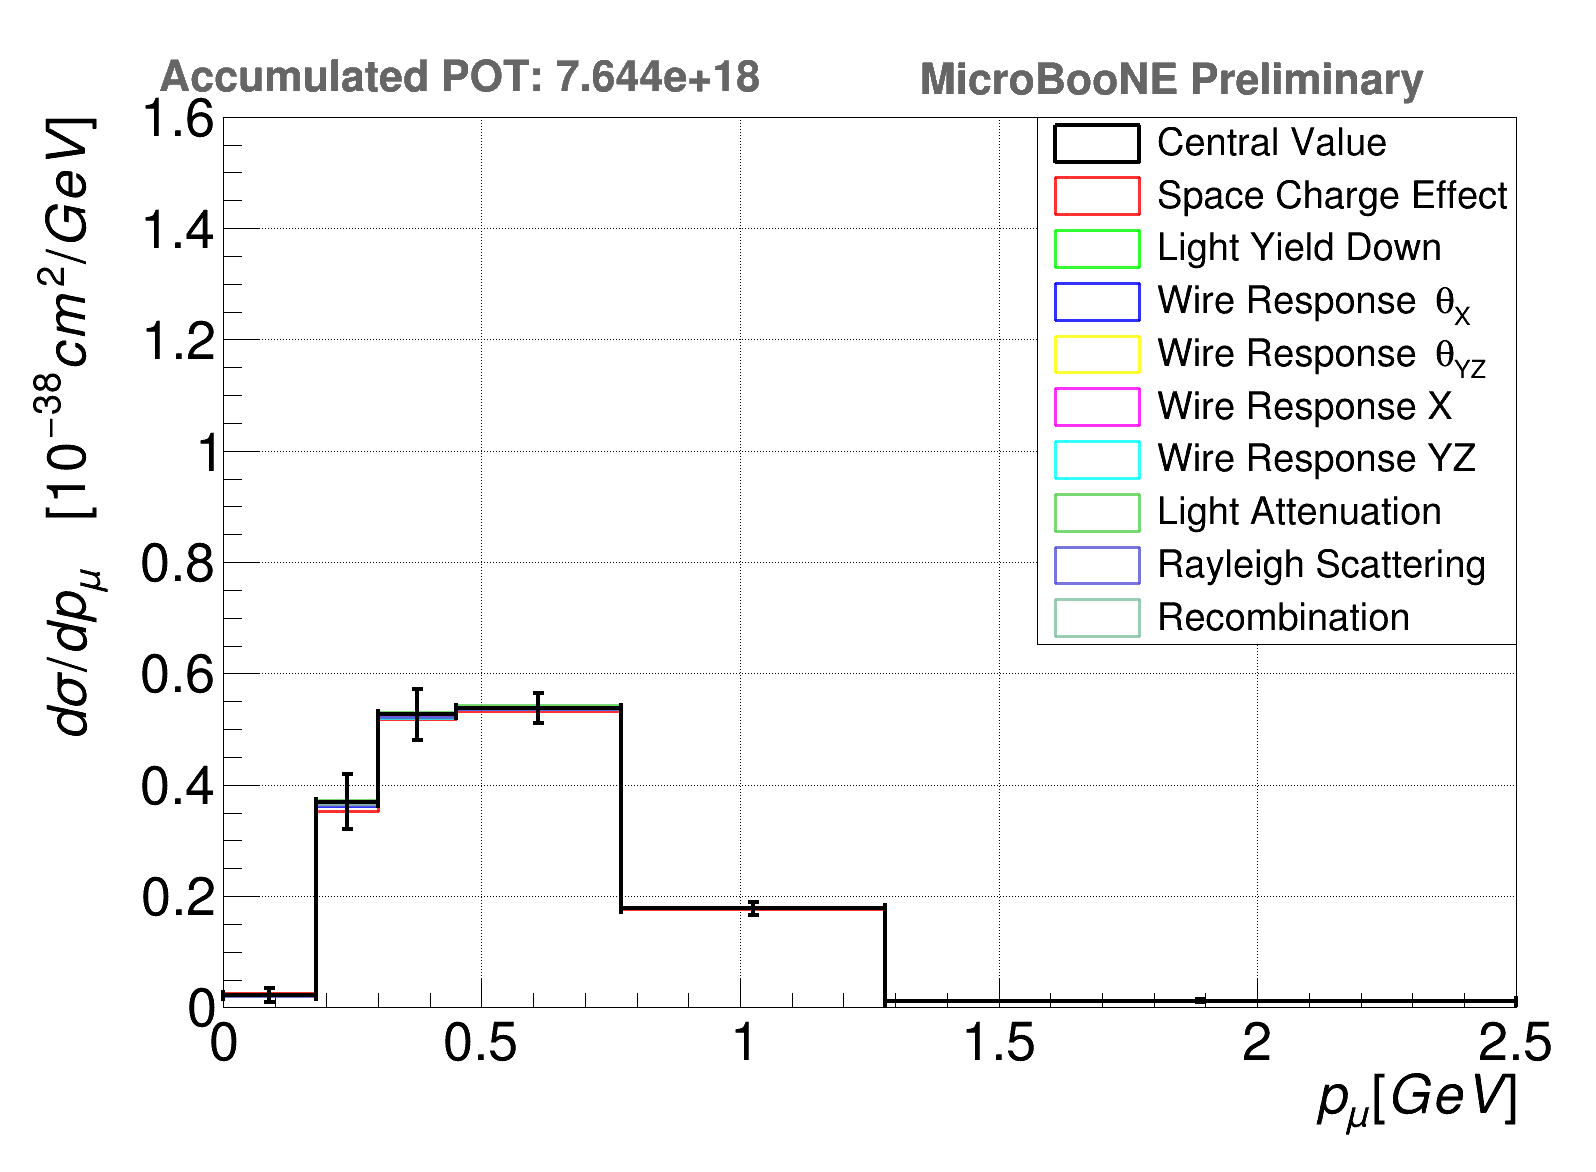

In [30]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
h_files = []
i = 0
legend = ROOT.TLegend(0.65,0.45,0.95,0.9); #LEGEND RIGHT
#legend = ROOT.TLegend(0.15,0.55,0.3,0.9); #LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_xsec_data'))
    h_files[i].Scale(1e38)
    h_files[i].SetMaximum(1.6)
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    legend.AddEntry(h_files[i],name_files[i],"f")
    h_files[i].SetYTitle("d\sigma / d p_{\mu} \t [10^{-38} cm^{2}/GeV]")
    h_files[i].SetXTitle("p_{\mu} [GeV]")
    if i == 0:
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
    i+=1
#for i in range(1,h_files[0].GetNbinsX()+1):
#    h_files[0].SetBinError(i,h_files[0].GetBinError(i)+math.sqrt(h_covariance.GetBinContent(i,i)))
h_files[0].SetLineColor(ROOT.kBlack)
h_files[0].Draw("hist E1 same")
h_stat = h_files[0].Clone()
legend.Draw()

c1.Draw()
del h_files[:]
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.SaveAs(outputdir_png + "h_xsec_detsys_all_det.png")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_all_det.pdf")
c1.SaveAs(outputdir_root + "h_xsec_detsys_all_det.root")

#h_files.clear()

In [31]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/png/h_xsec_detsys_wError.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/pdf/h_xsec_detsys_wError.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/root/h_xsec_detsys_wError.root has been created


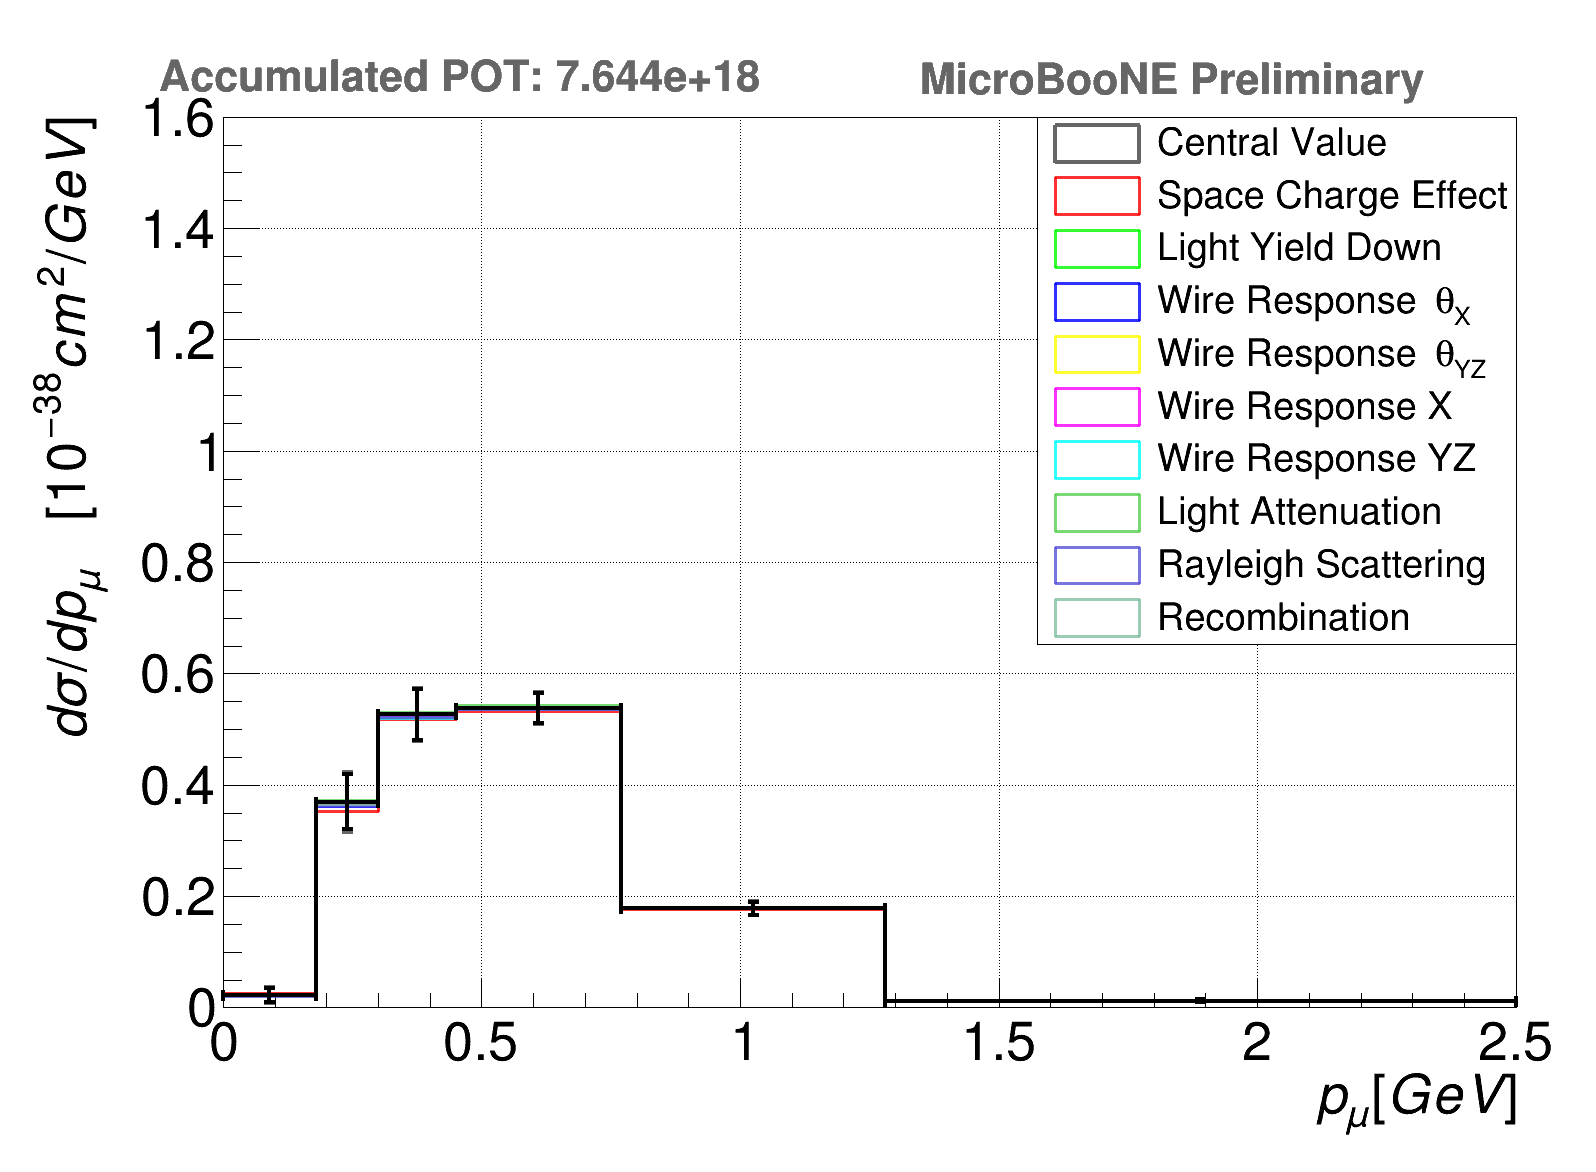

In [32]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
h_files = []
i = 0
legend = ROOT.TLegend(0.65,0.45,0.95,0.9); #LEGEND RIGHT
#legend = ROOT.TLegend(0.15,0.55,0.3,0.9); #LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_xsec_data'))
    h_files[i].Scale(1e38)
    h_files[i].SetMaximum(1.6)
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    legend.AddEntry(h_files[i],name_files[i],"f")
    h_files[i].SetYTitle("d\sigma / d p_{\mu} \t [10^{-38} cm^{2}/GeV]")
    h_files[i].SetXTitle("p_{\mu} [GeV]")
    if i == 0:
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('E1')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
    i+=1
for i in range(1,h_files[0].GetNbinsX()+1):
    h_files[0].SetBinError(i,math.sqrt(math.pow(h_files[0].GetBinError(i),2)+h_covariance.GetBinContent(i,i)*1e76))
    #h_files[0].SetBinError(i,h_files[0].GetBinError(i)+math.sqrt(h_covariance.GetBinContent(i,i))*1e38)
h_files[0].SetLineColor(ROOT.kGray+2)
h_files[0].Draw("E1 same")
h_stat.SetLineColor(ROOT.kBlack)
h_stat.SetMarkerSize(0.9)
h_stat.Draw('hist E1 same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
del h_files[:]

c1.SaveAs(outputdir_png + "h_xsec_detsys_wError.png")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_wError.pdf")
c1.SaveAs(outputdir_root + "h_xsec_detsys_wError.root")

#h_files.clear()

In [33]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


0.00495983066331
0.0206403705392
0.0131645567176
0.00869754879235
0.00199568973861
0.00065157319771


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/png/h_xsec_detsys_errdetsys_only.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/pdf/h_xsec_detsys_errdetsys_only.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/root/h_xsec_detsys_errdetsys_only.root has been created


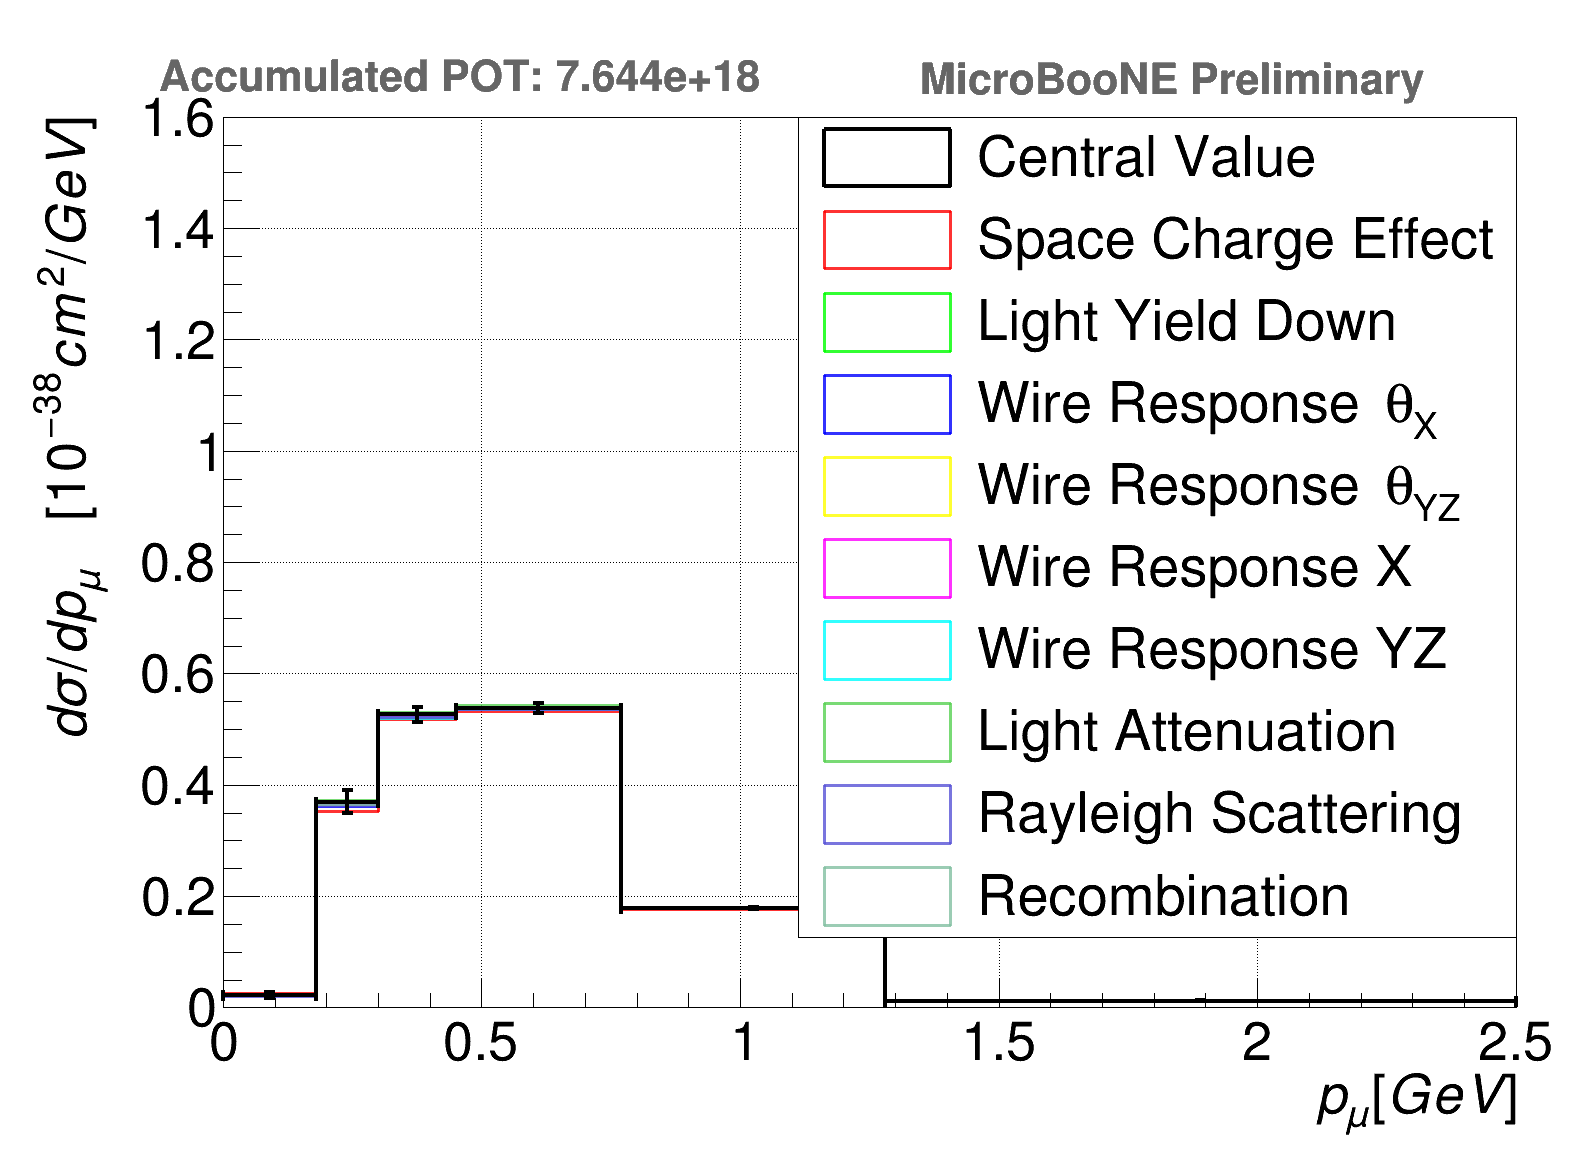

In [34]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
h_files = []
i = 0
legend = ROOT.TLegend(0.5,0.2,0.95,0.9); #LEGEND RIGHT
#legend = ROOT.TLegend(0.15,0.55,0.3,0.9); #LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_xsec_data'))
    h_files[i].Scale(1e38)
    h_files[i].SetMaximum(1.6)
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    legend.AddEntry(h_files[i],name_files[i],"f")
    h_files[i].SetYTitle("d\sigma / d p_{\mu} \t [10^{-38} cm^{2}/GeV]")
    h_files[i].SetXTitle("p_{\mu} [GeV]")
    if i == 0:
        for j in range(1,h_files[0].GetNbinsX()+1):
            h_files[0].SetBinError(j,math.sqrt(h_covariance.GetBinContent(j,j)*1e76))
            print h_files[0].GetBinError(j)
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('E1')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
    i+=1
h_files[0].SetLineColor(ROOT.kBlack)
h_files[0].Draw("E1 hist same")
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
del h_files[:]

c1.SaveAs(outputdir_png + "h_xsec_detsys_errdetsys_only.png")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_errdetsys_only.pdf")
c1.SaveAs(outputdir_root + "h_xsec_detsys_errdetsys_only.root")

#h_files.clear()

0.00495983066331
0.0206403705392
0.0131645567176
0.00869754879235
0.00199568973861
0.00065157319771


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/png/h_xsec_detsys_errdetsys_ratio.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/pdf/h_xsec_detsys_errdetsys_ratio.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/root/h_xsec_detsys_errdetsys_ratio.root has been created


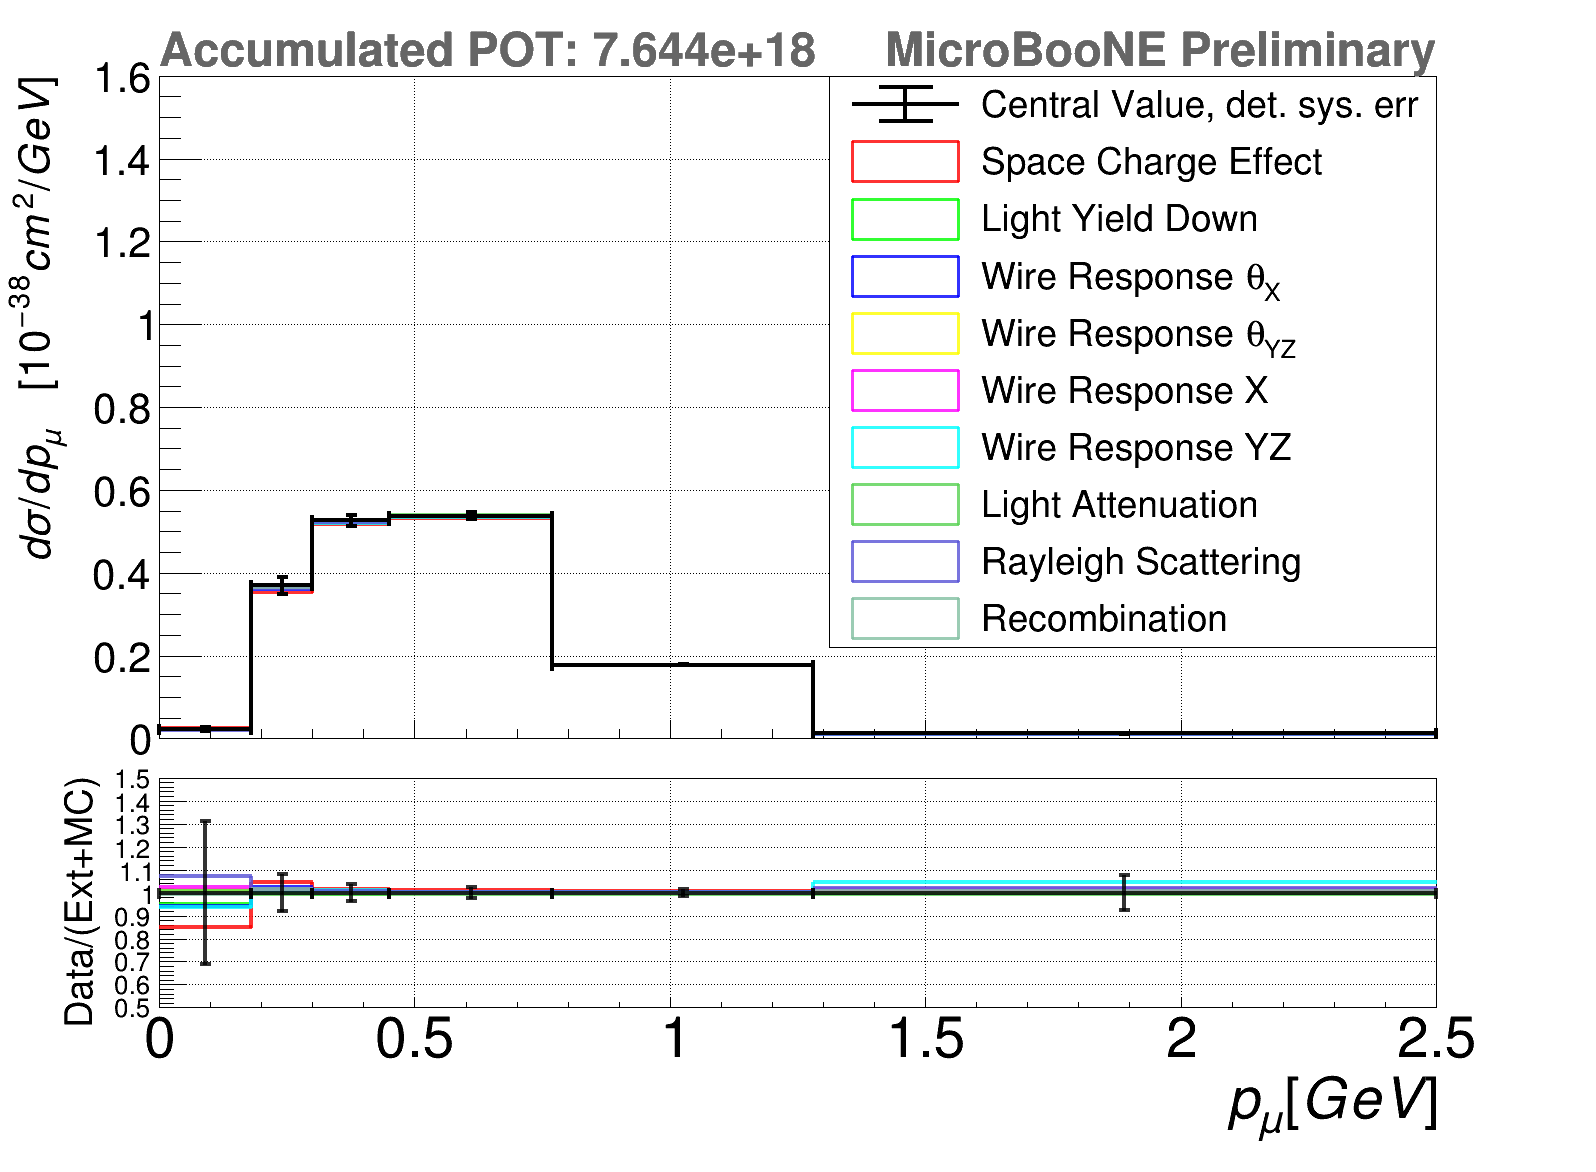

In [35]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
h_files = []
i = 0
legend = ROOT.TLegend(0.52,0.15,0.9,0.9); #LEGEND RIGHT
#legend = ROOT.TLegend(0.15,0.55,0.3,0.9); #LEGEND LEFT
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)
#c1.SetFillStyle(4000);
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)
for x in files:
    h_files.append(x.Get('h_xsec_data'))
    h_files[i].Scale(1e38)
    h_files[i].SetMaximum(1.6)
    h_files[i].SetMinimum(0)
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    if i ==0:
        legend.AddEntry(h_files[i],'Central Value, det. sys. err',"lep")
    else:
        legend.AddEntry(h_files[i],name_files[i],"f")
    h_files[i].SetYTitle("d\sigma / d p_{\mu} \t [10^{-38} cm^{2}/GeV]")
    h_files[i].SetXTitle("p_{\mu} [GeV]")
    if i == 0:
        for j in range(1,h_files[0].GetNbinsX()+1):
            h_files[0].SetBinError(j,math.sqrt(h_covariance.GetBinContent(j,j)*1e76))
            print h_files[0].GetBinError(j)
        #h_files[i].GetYaxis().SetTitleSize(0.06)
        #h_files[i].GetYaxis().SetTitleOffset(0.0)
        #h_files[i].GetYaxis().SetLabelSize(0.05)
        #h_files[i].GetXaxis().SetTitleSize(0.05)
        #h_files[i].GetXaxis().SetLabelSize(0.05)
        #h_files[i].GetXaxis().SetTitleOffset(1)
        h_files[i].GetYaxis().SetLabelSize(0.06);
        h_files[i].GetYaxis().SetTitleSize(0.06);
        h_files[i].GetYaxis().SetTitleOffset(0.8);
        h_files[i].GetXaxis().SetLabelOffset(999);
        h_files[i].GetXaxis().SetTitleOffset(999);
        h_files[i].GetXaxis().SetLabelSize(0);
        h_files[i].GetXaxis().SetTitleSize(0);
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('E1')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
    i+=1
h_files[0].SetLineColor(ROOT.kBlack)
h_files[0].Draw("E1 hist same")
legend.Draw()
prelim, pot_tex = draw_adding_ratio()
prelim.Draw()
pot_tex.Draw()

c1.cd()
h_files[0].GetXaxis().SetLabelOffset(0);
h_files[0].GetXaxis().SetTitleOffset(0);
#h_data.GetXaxis().SetLabelSize(0.06);
#pad2 = ROOT.TPad('pad2','pad2',0,0.05,1,0.33)
pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()
h_files2 = []
for i,x in enumerate(files):
    h_files2.append(h_files[0].Clone())
    h_files2[i].Divide(h_files[i])
    h_files2[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files2[i].SetLineColorAlpha(30,0.8)
    if i ==0 :
        h_files2[i].SetYTitle('Data/(Ext+MC)')
        h_files2[i].GetYaxis().SetTitleSize(0.1)
        h_files2[i].GetYaxis().SetTitleOffset(0.3)
        h_files2[i].GetYaxis().SetLabelSize(0.07)

        h_files2[i].GetXaxis().SetTitleSize(0.15)
        h_files2[i].GetXaxis().SetLabelSize(0.15)
        h_files2[i].GetXaxis().SetTitleOffset(1)
        h_files2[i].SetMinimum(0.5)
        h_files2[i].SetMaximum(1.5)
        h_files2[i].Draw('hist')
    else:
        h_files2[i].Draw('hist same')

h_files2[0].Draw('E1 same')
c1.Draw()
del h_files[:]

c1.SaveAs(outputdir_png + "h_xsec_detsys_errdetsys_ratio.png")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_errdetsys_ratio.pdf")
c1.SaveAs(outputdir_root + "h_xsec_detsys_errdetsys_ratio.root")

#h_files.clear()

In [36]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [37]:
mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
binnum = len(mom_bins) - 1

In [38]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
del h_files[:]
h_files_data = []
h_files_ext = []
h_files_dirt = []
h_files_overlay = []
h_files_eff = []
h_files_eff_true = []

'''Number of data: 1348
Number of ext: 142.179032863
Number of dirt: 32.1298248268
Number of overlay: 201.313414536
Number of overlay signal: 970.556760372
'''
n_data = 1348.0
n_ext = 142.179032863
n_dirt = 32.1298248268
N_tot = 4.10331e+31
beam_flux = 5.64049e+09

i = 0
xsec_CV = 0.0
tot_diff = 0.0
print f_cv
legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
#legend = ROOT.TLegend(0.15,0.65,0.3,0.9) # LEGEND LEFT
for x in files:
    print '###', name_files[i],'###################################################################'
    h_files_overlay.append(x.Get('h_overlay'))
    h_files_eff.append(x.Get('h_eff_true_energy_z'))
    h_files_eff_true.append(x.Get('h_eff_true_energy_n'))

    #print h_files_eff[i].Integral(0,binnum+1)
    #print h_files_eff_true[i].Integral(0,binnum+1)
    
    eff = h_files_eff[i].Integral(0,binnum+1)/h_files_eff_true[i].Integral(0,binnum+1)
    xsec = (n_data - n_ext - n_dirt - h_files_overlay[i].Integral(0,binnum+1))/(N_tot*beam_flux*eff)
    if i==0:
        xsec_CV = xsec
    
    #print n_data, n_ext, n_dirt, h_files_overlay[i].Integral(0,binnum+1)
    #print N_tot, beam_flux, eff
    #print 'Total xsec of: ',name_files[i],' = {0:0.5f}'.format(xsec*1e38),' difference= {0:0.2f}'.format((xsec - xsec_CV)/xsec_CV*100),'%'
    print 'Total xsec of: ',name_files[i],' = {0:0.5f}e-38'.format(xsec*1e38),' & {0:0.2f}'.format((xsec - xsec_CV)/xsec_CV*100),'\%'
    i +=1
    tot_diff = tot_diff+(xsec - xsec_CV)*(xsec - xsec_CV)
tot_diff = math.sqrt(tot_diff)
print 'Total differencs: ',tot_diff, ' in percent: ',tot_diff/xsec_CV*100,'%'

Name: /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_CV_t/xsec_detsys_CV.root Title: 
### Central Value ###################################################################
Total xsec of:  Central Value  = 0.72039e-38  & 0.00 \%
### Space Charge Effect ###################################################################
Total xsec of:  Space Charge Effect  = 0.70949e-38  & -1.51 \%
### Light Yield Down ###################################################################
Total xsec of:  Light Yield Down  = 0.72319e-38  & 0.39 \%
### Wire Response #theta_{X} ###################################################################
Total xsec of:  Wire Response #theta_{X}  = 0.71623e-38  & -0.58 \%
### Wire Response #theta_{YZ} ###################################################################
Total xsec of:  Wire Response #theta_{YZ}  = 0.72172e-38  & 0.18 \%
### Wire Response X ###################################################################
Total xsec of:  Wi

In [39]:
x.Get('h_data')

<ROOT.TH1F object ("h_data") at 0x705d8e0>

In [40]:
RootFile.Close()

# now in cos theta

In [41]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/png/h_xsec_detsys_theta_all.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/root/h_xsec_detsys_theta_all.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/pdf/h_xsec_detsys_theta_all.pdf has been created


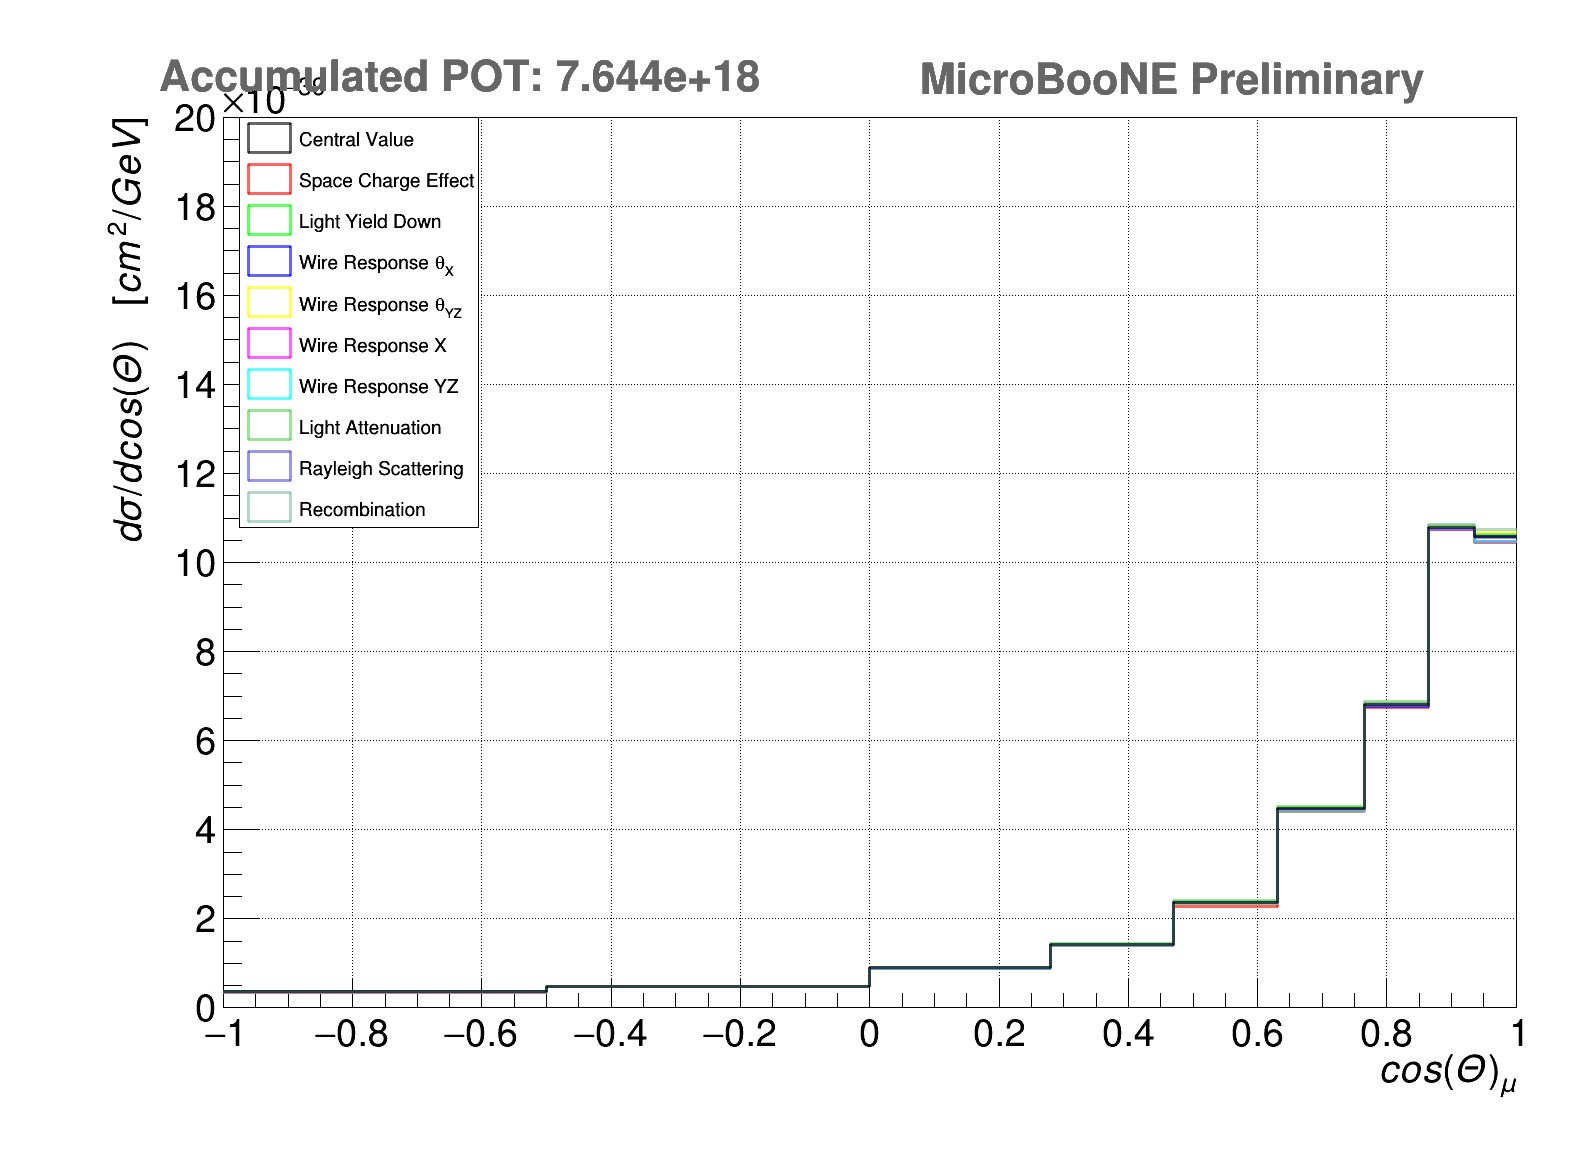

In [42]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
h_files = []
i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.55,0.3,0.9); #LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_xsec_data_theta'))
    h_files[i].SetLineColorAlpha(i+1,0.6)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.6)
    legend.AddEntry(h_files[i],name_files[i],"f")
    h_files[i].SetYTitle("d\sigma / d cos(\Theta) \t [cm^{2}/GeV]")
    h_files[i].SetXTitle("cos(\Theta)_{\mu}")
    if x == 0:
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
    i+=1
h_files[0].Draw("hist same")
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
del h_files[:]

c1.SaveAs(outputdir_png + "h_xsec_detsys_theta_all.png")
c1.SaveAs(outputdir_root + "h_xsec_detsys_theta_all.root")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_theta_all.pdf")

#h_files.clear()

In [43]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ' ,'LYAttenuation', 'LYRayleigh' ]
num_file = 11
h_files = []
i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.55,0.3,0.9); #LEGEND LEFT

for x in files:
    h_files.append(x.Get('h_xsec_data_theta'))
num_bins = h_files[0].GetNbinsX()

xsec_diff_matrix = np.zeros((num_bins))

xsec_cov_matrix = np.zeros((num_bins,num_bins))

for f in range(1,num_file-1):
    xsec_diff_matrix = np.zeros((num_bins))
    for b in range(num_bins):
        xsec_diff_matrix[b]= (h_files[0].GetBinContent(b+1)-h_files[f].GetBinContent(b+1) )/(h_files[0].GetBinContent(b+1) + 1e-100)
    #print np.matmul(xsec_diff_matrix,np.transpose(xsec_diff_matrix))
    xsec_cov_matrix = xsec_cov_matrix + xsec_diff_matrix.reshape(num_bins,1) * xsec_diff_matrix
np.save(output_filedir+'frac_covariance_theta_detsys',xsec_cov_matrix)

In [44]:
RootFile_theta = ROOT.TFile(output_filedir+"Detector_systematic_theta.root","RECREATE");

763

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/png/h_frac_covariance_theta_detsys.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/pdf/h_frac_covariance_theta_detsys.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/root/h_frac_covariance_theta_detsys.root has been created


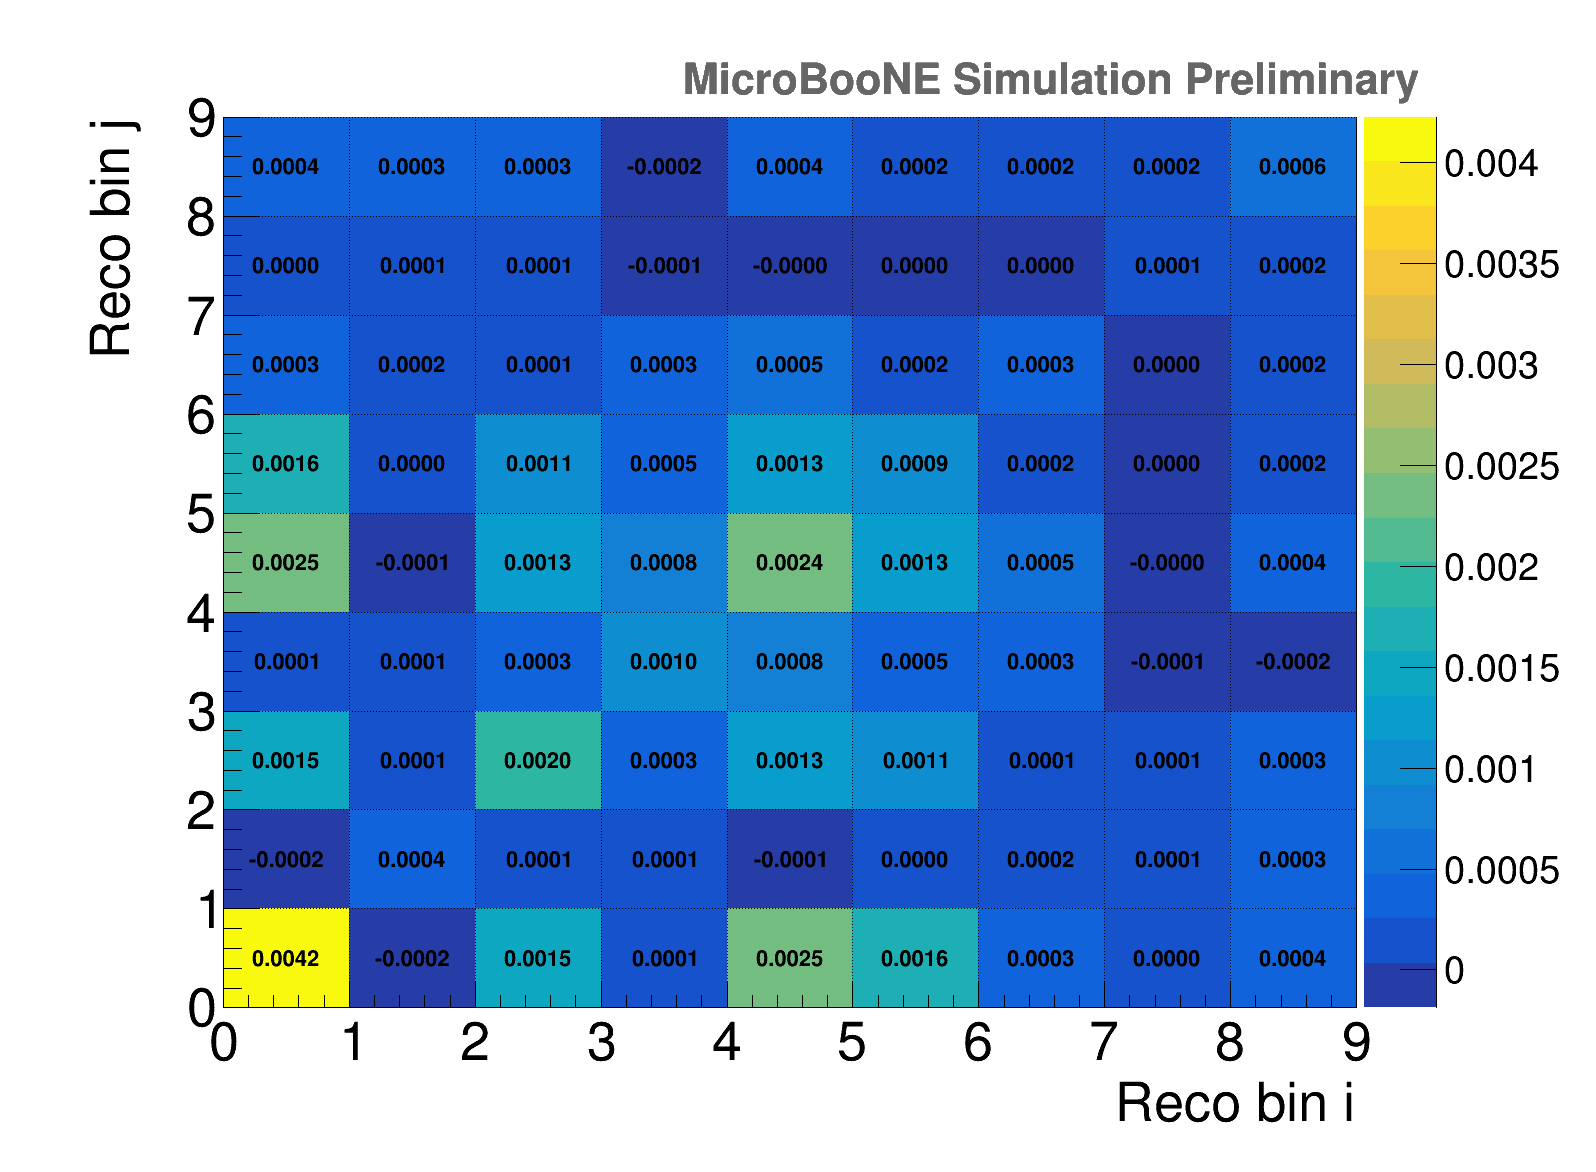

In [45]:
ROOT.gStyle.SetPaintTextFormat('0.6f')
h_covariance = ROOT.TH2F("h_covariance",'Covariance matrix',9,0,9,9,0,9)
for i in range(num_bins):
    for j in range(num_bins):
        h_covariance.SetBinContent(i+1,j+1,xsec_cov_matrix[i,j])
h_covariance.SetXTitle("Reco bin i")
h_covariance.SetYTitle("Reco bin j")
h_covariance.GetYaxis().SetTitleSize(0.05)
h_covariance.GetYaxis().SetTitleOffset(0.0)
h_covariance.GetYaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleSize(0.05)
h_covariance.GetXaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleOffset(1)
h_covariance.SetLineColor(ROOT.kBlack)
h_covariance.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.15)
ROOT.gStyle.SetPaintTextFormat('0.4f')
h_covariance.Draw('colz')
c1.SetLogz(0)
h_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_frac_covariance_theta_detsys.png")
c1.SaveAs(outputdir_pdf + "h_frac_covariance_theta_detsys.pdf")
c1.SaveAs(outputdir_root + "h_frac_covariance_theta_detsys.root")
h_covariance.Write('h_frac_covariance')

In [46]:
quad_sum = 0.1
for i in range(num_bins):
    quad_sum = quad_sum+xsec_cov_matrix[i,i]
    print i, ' - ', xsec_cov_matrix[i,i], ' sqrt: ', math.sqrt(xsec_cov_matrix[i,i])
    
print 'Qad sum: ', quad_sum,' sqrt: ', math.sqrt(quad_sum)
print 'Qad sum: ', quad_sum/num_bins,' sqrt: ', math.sqrt(quad_sum/num_bins)
    

0  -  0.004223516074734055  sqrt:  0.0649885841878
1  -  0.0004409609251876319  sqrt:  0.0209990696267
2  -  0.0019671618901619375  sqrt:  0.0443526987923
3  -  0.0010204482824039331  sqrt:  0.0319444562077
4  -  0.002390908324873529  sqrt:  0.04889691529
5  -  0.0009418467742849845  sqrt:  0.0306895222231
6  -  0.0003241268494591115  sqrt:  0.0180035232513
7  -  9.822710166701033e-05  sqrt:  0.00991095866539
8  -  0.0006330319612632197  sqrt:  0.0251601264159
Qad sum:  0.11204022818403539  sqrt:  0.334724107563
Qad sum:  0.012448914242670599  sqrt:  0.111574702521


In [47]:
quad_sum = 0.0
for f in range(1,num_file-1):
    for b in range(1):
        err = h_files[0].GetBinContent(b+1)-h_files[f].GetBinContent(b+1)
        print err, err/h_files[0].GetBinContent(b+1)
        quad_sum = quad_sum + err*err
print quad_sum , quad_sum/h_files[0].GetBinContent(1)/h_files[0].GetBinContent(1)
print math.sqrt(quad_sum), math.sqrt(quad_sum)/h_files[0].GetBinContent(1)
print h_files[0].GetBinContent(1)

1.42399949945e-41 0.0390347709847
-3.14171115702e-42 -0.00861207995944
4.11981748511e-42 0.0112932716685
-8.04345318522e-43 -0.00220487684956
1.16195668662e-41 0.0318516356038
2.04029056406e-42 0.00559285835011
-3.41636565602e-42 -0.00936496473734
1.15747253153e-42 0.003172871564
1.34020185128e-41 0.0367377041624
5.62070190857e-82 0.00422351607473
2.37080195473e-41 0.0649885841878
3.64802831815e-40


In [48]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ' ,'LYAttenuation', 'LYRayleigh' ]
num_file = 11
h_files = []
i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.55,0.3,0.9); #LEGEND LEFT

for x in files:
    h_files.append(x.Get('h_xsec_data_theta'))
num_bins = h_files[0].GetNbinsX()
xsec_diff_matrix = np.zeros((num_bins))
xsec_cov_matrix = np.zeros((num_bins,num_bins))
for f in range(1,num_file-1):
    xsec_diff_matrix = np.zeros((num_bins))
    for b in range(num_bins):
        xsec_diff_matrix[b]= (h_files[0].GetBinContent(b+1)-h_files[f].GetBinContent(b+1) )
    #print np.matmul(xsec_diff_matrix,np.transpose(xsec_diff_matrix))
    xsec_cov_matrix = xsec_cov_matrix + xsec_diff_matrix.reshape(num_bins,1) * xsec_diff_matrix
    
xsec_corr_matrix = np.zeros((num_bins,num_bins))
for i in range(num_bins):
    for j in range(num_bins):
        xsec_corr_matrix[i][j] = xsec_cov_matrix[i][j]/(math.sqrt(xsec_cov_matrix[i][i]*xsec_cov_matrix[j][j]))

np.save(output_filedir+'correlation_theta_detsys',xsec_corr_matrix)
np.save(output_filedir+'covariance_theta_detsys',xsec_cov_matrix)

926

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/png/h_correlation_theta_detsys.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/pdf/h_correlation_theta_detsys.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/root/h_correlation_theta_detsys.root has been created


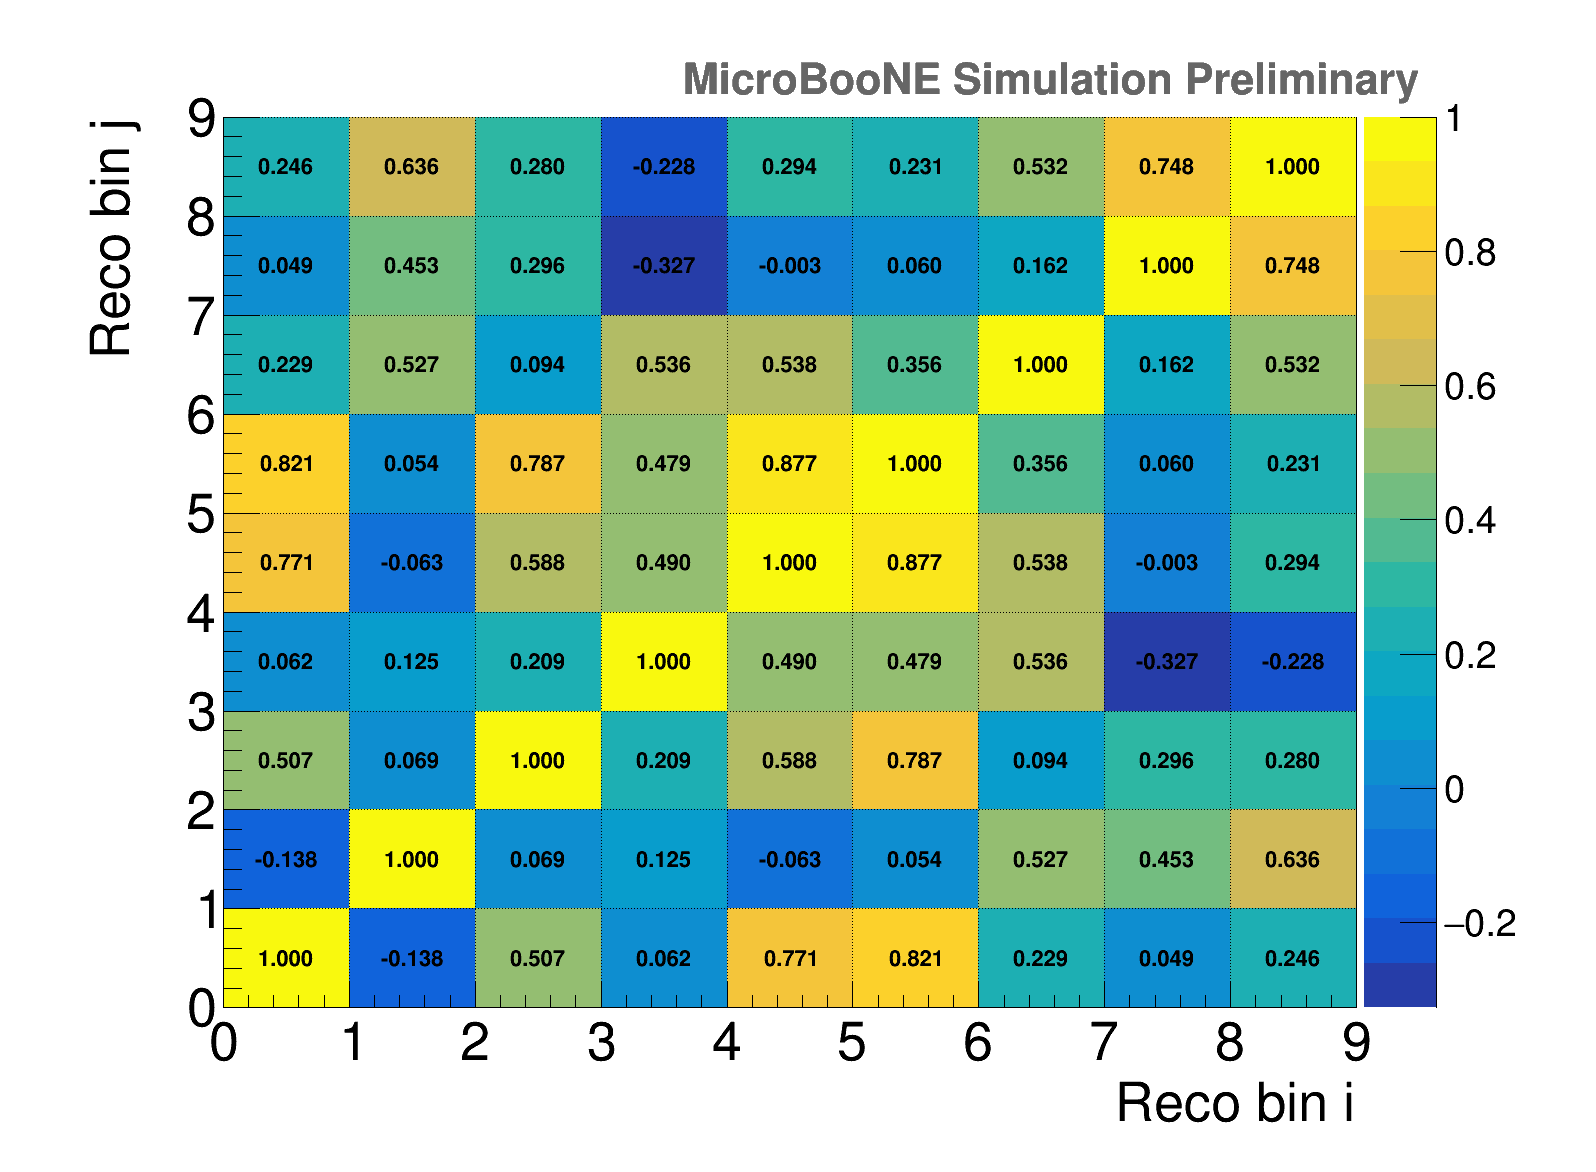

In [49]:
ROOT.gStyle.SetPaintTextFormat('0.3f')
h_correlation = ROOT.TH2D("h_correlation",'Correlation matrix',9,0,9,9,0,9)
for i in range(num_bins):
    for j in range(num_bins):
        h_correlation.SetBinContent(i+1,j+1,xsec_corr_matrix[i,j])
#h_covariance.SetXTitle("Reco bin i, 7=overflow")
#h_covariance.SetYTitle("True bin j")
h_correlation.SetXTitle("Reco bin i")
h_correlation.SetYTitle("Reco bin j")
h_correlation.GetYaxis().SetTitleSize(0.05)
h_correlation.GetYaxis().SetTitleOffset(0.0)
h_correlation.GetYaxis().SetLabelSize(0.05)
h_correlation.GetXaxis().SetTitleSize(0.05)
h_correlation.GetXaxis().SetLabelSize(0.05)
h_correlation.GetXaxis().SetTitleOffset(1)
h_correlation.SetLineColor(ROOT.kBlack)
h_correlation.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.15)
ROOT.gStyle.SetPaintTextFormat('0.3f')
#h_correlation.SetMinimum(-1)
h_correlation.Draw('colz')
h_correlation.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_correlation_theta_detsys.png")
c1.SaveAs(outputdir_pdf + "h_correlation_theta_detsys.pdf")
c1.SaveAs(outputdir_root + "h_correlation_theta_detsys.root")
h_correlation.Write('h_correlation')

876

Warning in <TFile::Append>: Replacing existing TH1: h_covariance (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/png/h_covariance_theta_detsys.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/pdf/h_covariance_theta_detsys.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/root/h_covariance_theta_detsys.root has been created


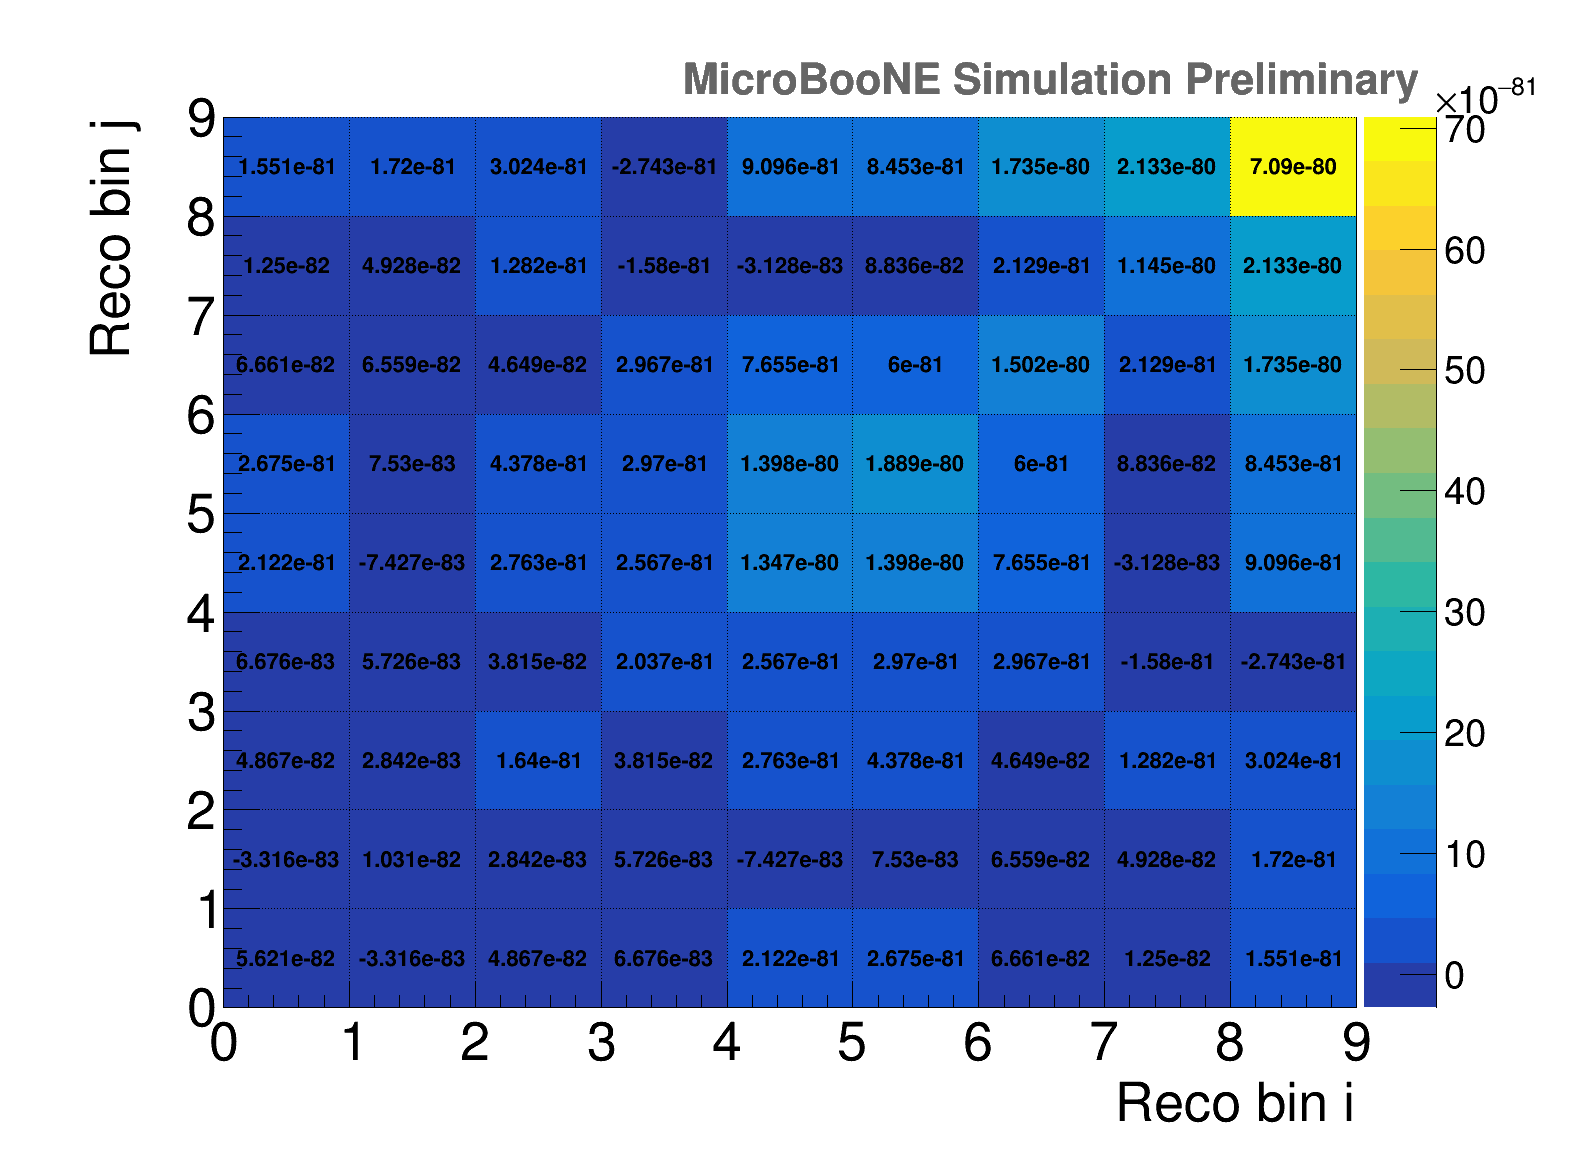

In [50]:
ROOT.gStyle.SetPaintTextFormat('0.3g')
h_covariance = ROOT.TH2D("h_covariance",'Covariance matrix',9,0,9,9,0,9)
for i in range(num_bins):
    for j in range(num_bins):
        h_covariance.SetBinContent(i+1,j+1,xsec_cov_matrix[i,j])
#h_covariance.SetXTitle("Reco bin i, 7=overflow")
#h_covariance.SetYTitle("True bin j")
h_covariance.SetXTitle("Reco bin i")
h_covariance.SetYTitle("Reco bin j")
h_covariance.GetYaxis().SetTitleSize(0.05)
h_covariance.GetYaxis().SetTitleOffset(0.0)
h_covariance.GetYaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleSize(0.05)
h_covariance.GetXaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleOffset(1)
h_covariance.SetLineColor(ROOT.kBlack)
h_covariance.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.15)
ROOT.gStyle.SetPaintTextFormat('0.4g')
h_covariance.Draw('colz')
h_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_covariance_theta_detsys.png")
c1.SaveAs(outputdir_pdf + "h_covariance_theta_detsys.pdf")
c1.SaveAs(outputdir_root + "h_covariance_theta_detsys.root")
h_covariance.Write('h_covariance')

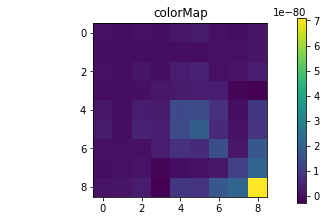

In [51]:
fig = plt.figure(figsize=(6, 3.2))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(xsec_cov_matrix)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show() 

In [52]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/png/h_eff_tilde_theta_detsys.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/pdf/h_eff_tilde_theta_detsys.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/root/h_eff_tilde_theta_detsys.root has been created


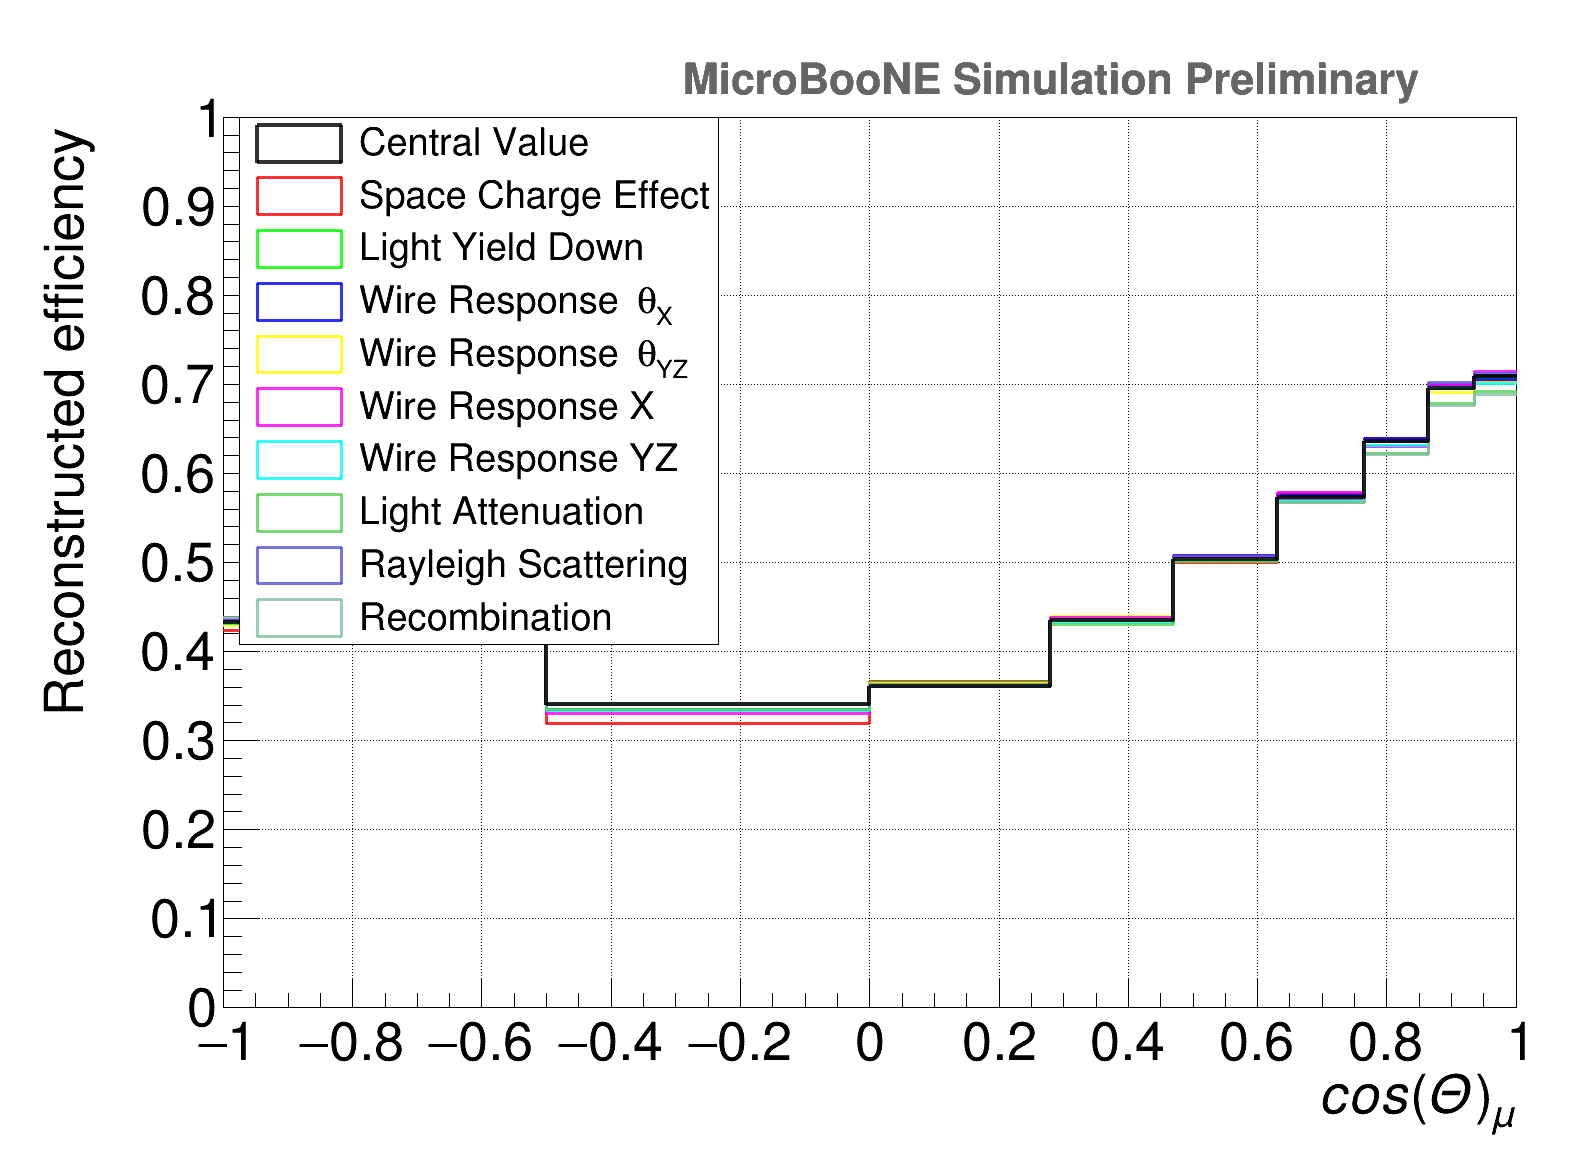

In [53]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
del h_files[:]
h_files = []
i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.45,0.45,0.9) # LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_eff_theta_tilde'))
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    legend.AddEntry(h_files[i],name_files[i],"f")
    if i == 0:
        h_files[i].SetYTitle("Reconstructed efficiency")
        #h_files[i].SetXTitle("p_{\mu} \quad [GeV]")
        h_files[i].SetXTitle("cos(\Theta)_{\mu}")
        #h_files[i].SetYTitle("d\sigma / d cos(\Theta) \quad [cm^2/GeV]")
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        legend.Draw()
    else:
        h_files[i].SetYTitle("Reconstructed efficiency")
        #h_files[i].SetXTitle("p_{\mu} \quad [GeV]")
        h_files[i].SetXTitle("cos(\Theta)_{\mu}")
        h_files[i].Draw("hist same")
    i+=1
h_files[0].Draw("hist same")
legend.Draw()
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_tilde_theta_detsys.png")
c1.SaveAs(outputdir_pdf + "h_eff_tilde_theta_detsys.pdf")
c1.SaveAs(outputdir_root + "h_eff_tilde_theta_detsys.root")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/png/h_eff_true_theta_detsys.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/pdf/h_eff_true_theta_detsys.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/root/h_eff_true_theta_detsys.root has been created


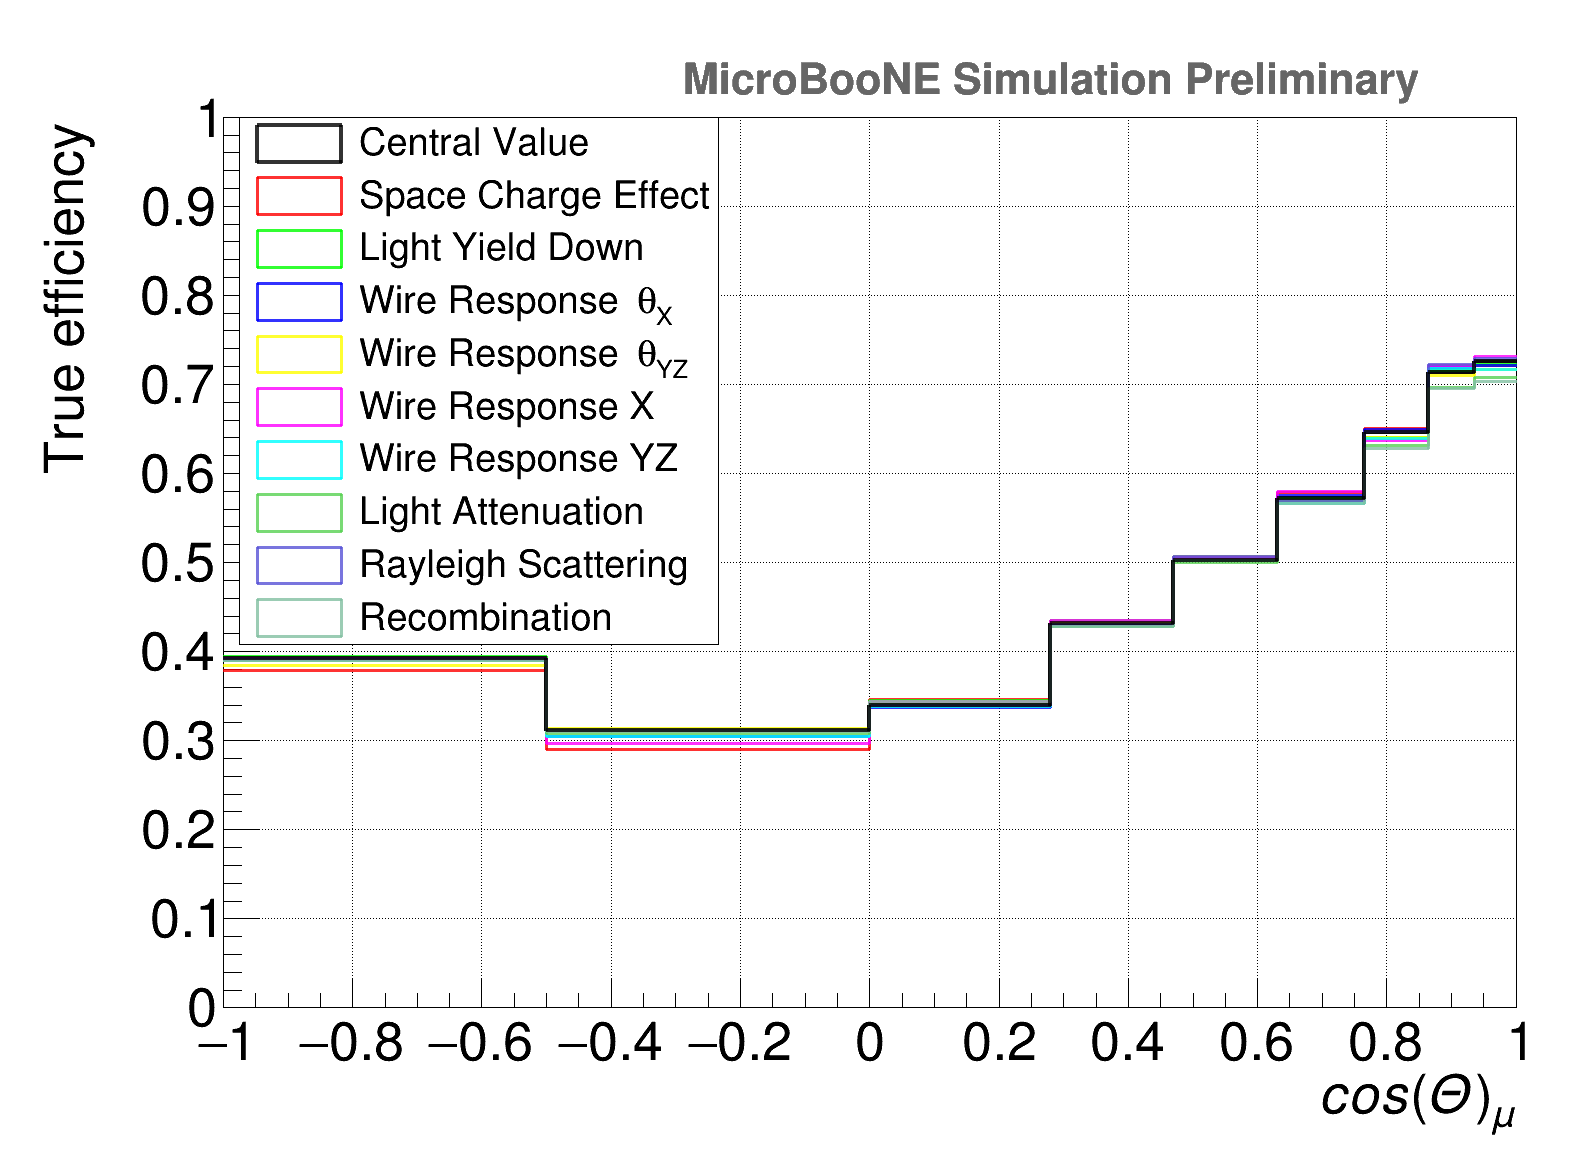

In [54]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
#del h_files_z[:]
#del h_files_n[:]
del h_files[:]
h_files_z = []
h_files_n = []
h_files = []

i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.45,0.45,0.9) # LEGEND LEFT
for x in files:
    h_files_z.append(x.Get('h_eff_true_theta_z'))
    h_files_n.append(x.Get('h_eff_true_theta_n'))
    h_files.append(h_files_z[i])
    h_files[i].Divide(h_files_n[i])
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    h_files[i].SetLineWidth(3)
    h_files[i].SetMaximum(1)
    h_files[i].SetMinimum(0)
    legend.AddEntry(h_files[i],name_files[i],"f")
    if i == 0:
        h_files[i].SetYTitle("True efficiency")
        h_files[i].SetXTitle("cos(\Theta)_{\mu}")
        #h_files[i].SetYTitle("d\sigma / d cos(\Theta) \quad [cm^2/GeV]")
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
        h_files[i].SetYTitle("Reconstructed efficiency")
        h_files[i].SetXTitle("cos(\Theta)_{\mu}")
        #h_files[i].SetYTitle("d\sigma / d cos(\Theta) \quad [cm^2/GeV]")
    i+=1
h_files[0].Draw("hist same")
legend.Draw()
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_true_theta_detsys.png")
c1.SaveAs(outputdir_pdf + "h_eff_true_theta_detsys.pdf")
c1.SaveAs(outputdir_root + "h_eff_true_theta_detsys.root")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/png/h_overlay_theta_detsys.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/pdf/h_overlay_theta_detsys.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/root/h_overlay_theta_detsys.root has been created


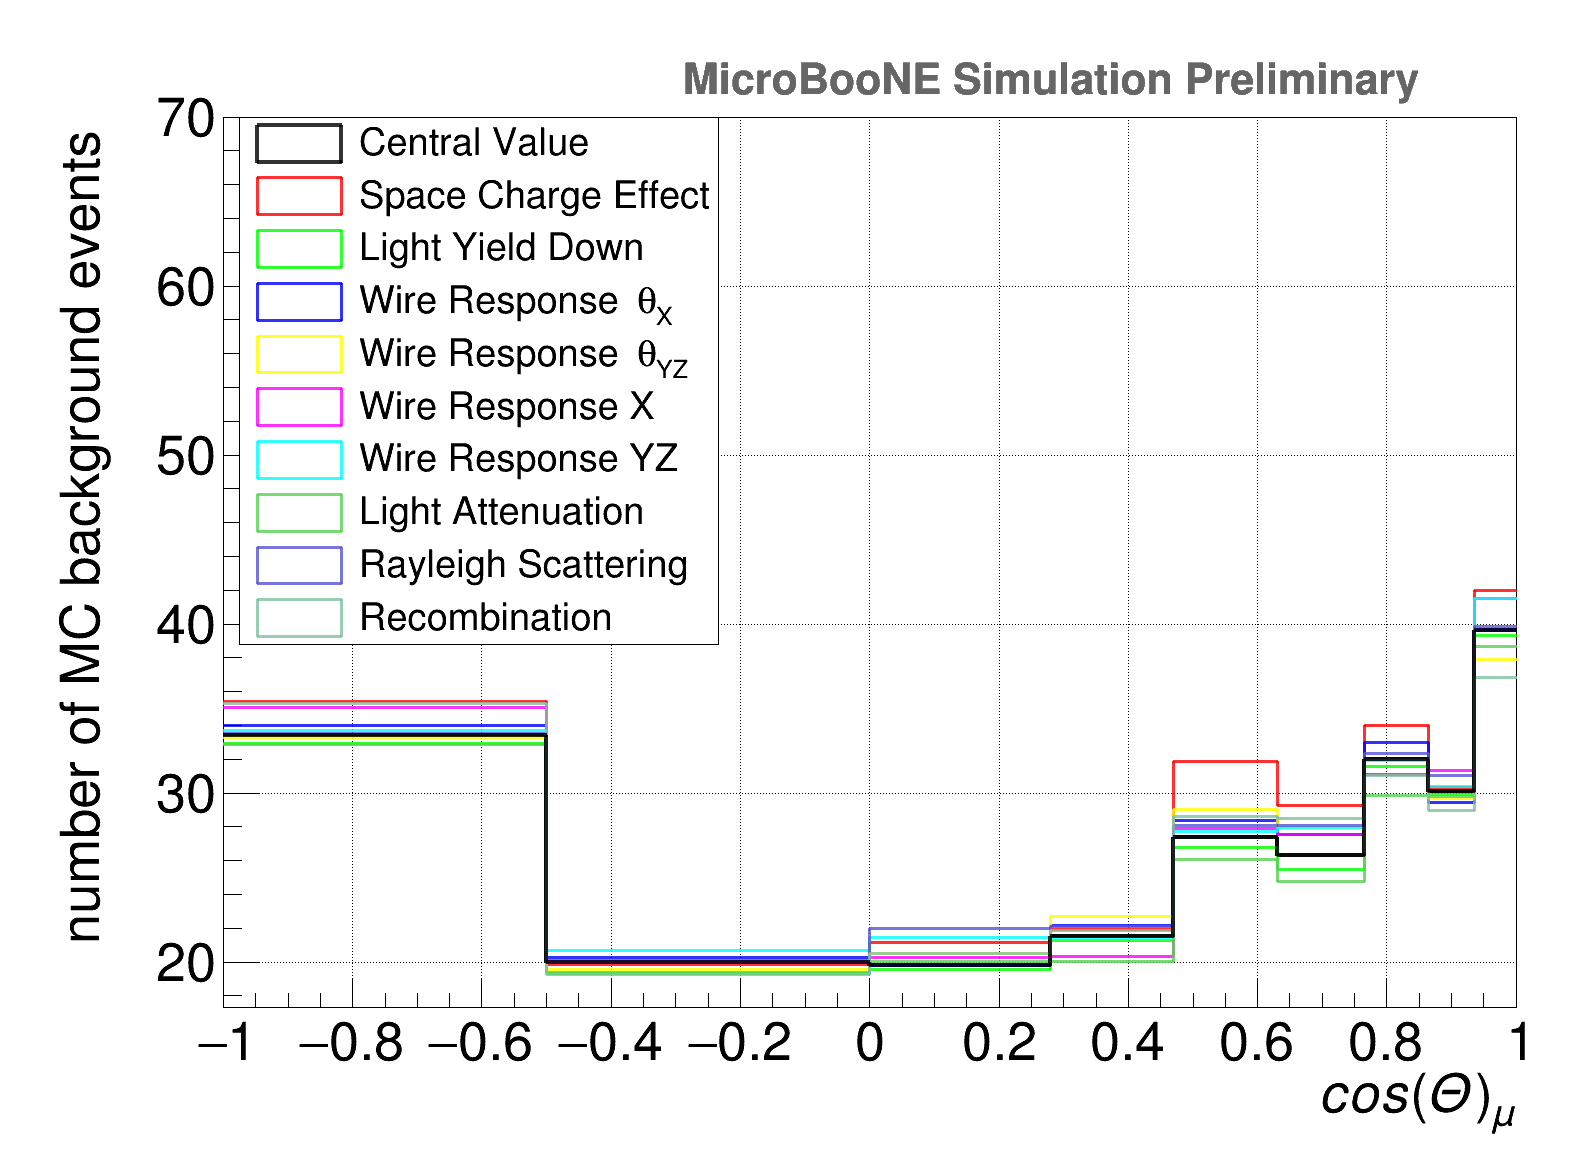

In [55]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
del h_files[:]
h_files = []
i = 0
#legend = ROOT.TLegend(0.65,0.45,0.95,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.45,0.45,0.9) # LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_overlay_theta'))
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    h_files[i].SetLineWidth(3)
    #h_files[i].SetMaximum(1)
    #h_files[i].SetMinimum(0)
    legend.AddEntry(h_files[i],name_files[i],"f")
    if i == 0:
        h_files[i].SetMaximum(70)
        h_files[i].SetYTitle("number of MC background events")
        h_files[i].SetXTitle("cos(\Theta)_{\mu}")
        #h_files[i].SetYTitle("d\sigma / d cos(\Theta) \quad [cm^2/GeV]")
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        legend.Draw()
    else:
        h_files[i].SetMaximum(70)
        h_files[i].Draw("hist same")
        h_files[i].SetYTitle("number of MC background events")
        h_files[i].SetXTitle("cos(\Theta)_{\mu}")
        #h_files[i].SetYTitle("d\sigma / d cos(\Theta) \quad [cm^2/GeV]")
    i+=1
h_files[0].Draw("hist same")
legend.Draw()
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_overlay_theta_detsys.png")
c1.SaveAs(outputdir_pdf + "h_overlay_theta_detsys.pdf")
c1.SaveAs(outputdir_root + "h_overlay_theta_detsys.root")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/png/h_xsec_detsys_theta_stat.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/pdf/h_xsec_detsys_theta_stat.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/root/h_xsec_detsys_theta_stat.root has been created


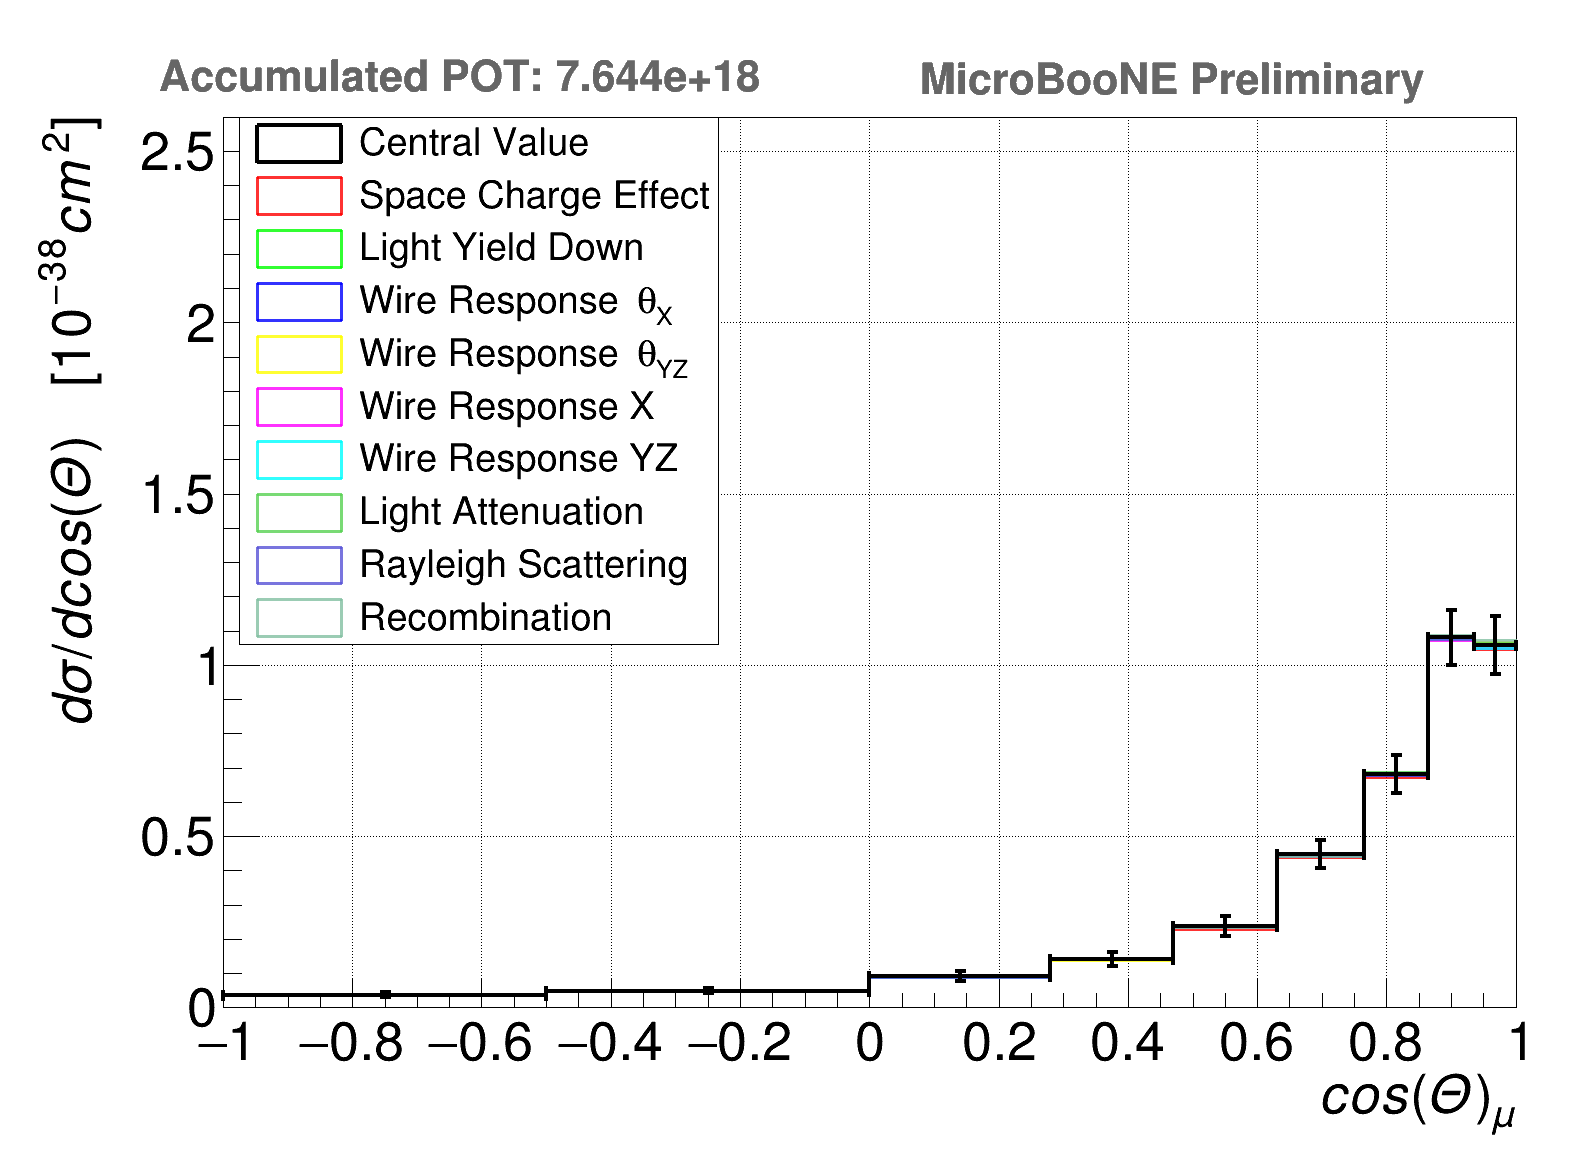

In [56]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
h_files = []
i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.45,0.45,0.9) # LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_xsec_data_theta'))
    h_files[i].Scale(1e38)
    h_files[i].SetMaximum(2.6)
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    legend.AddEntry(h_files[i],name_files[i],"f")
    h_files[i].SetYTitle("d\sigma / d cos(\Theta) \t [10^{-38} cm^{2}]")
    h_files[i].SetXTitle("cos(\Theta)_{\mu}")
    if i == 0:
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
    i+=1
#for i in range(1,h_files[0].GetNbinsX()+1):
#    h_files[0].SetBinError(i,h_files[0].GetBinError(i)+math.sqrt(h_covariance.GetBinContent(i,i)))
h_files[0].SetLineColor(ROOT.kBlack)
h_files[0].Draw("hist E1 same")
h_stat = h_files[0].Clone()
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
del h_files[:]

c1.SaveAs(outputdir_png + "h_xsec_detsys_theta_stat.png")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_theta_stat.pdf")
c1.SaveAs(outputdir_root + "h_xsec_detsys_theta_stat.root")

#h_files.clear()

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/png/h_xsec_detsys_theta_all_wError.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/pdf/h_xsec_detsys_theta_all_wError.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/root/h_xsec_detsys_theta_all_wError.root has been created


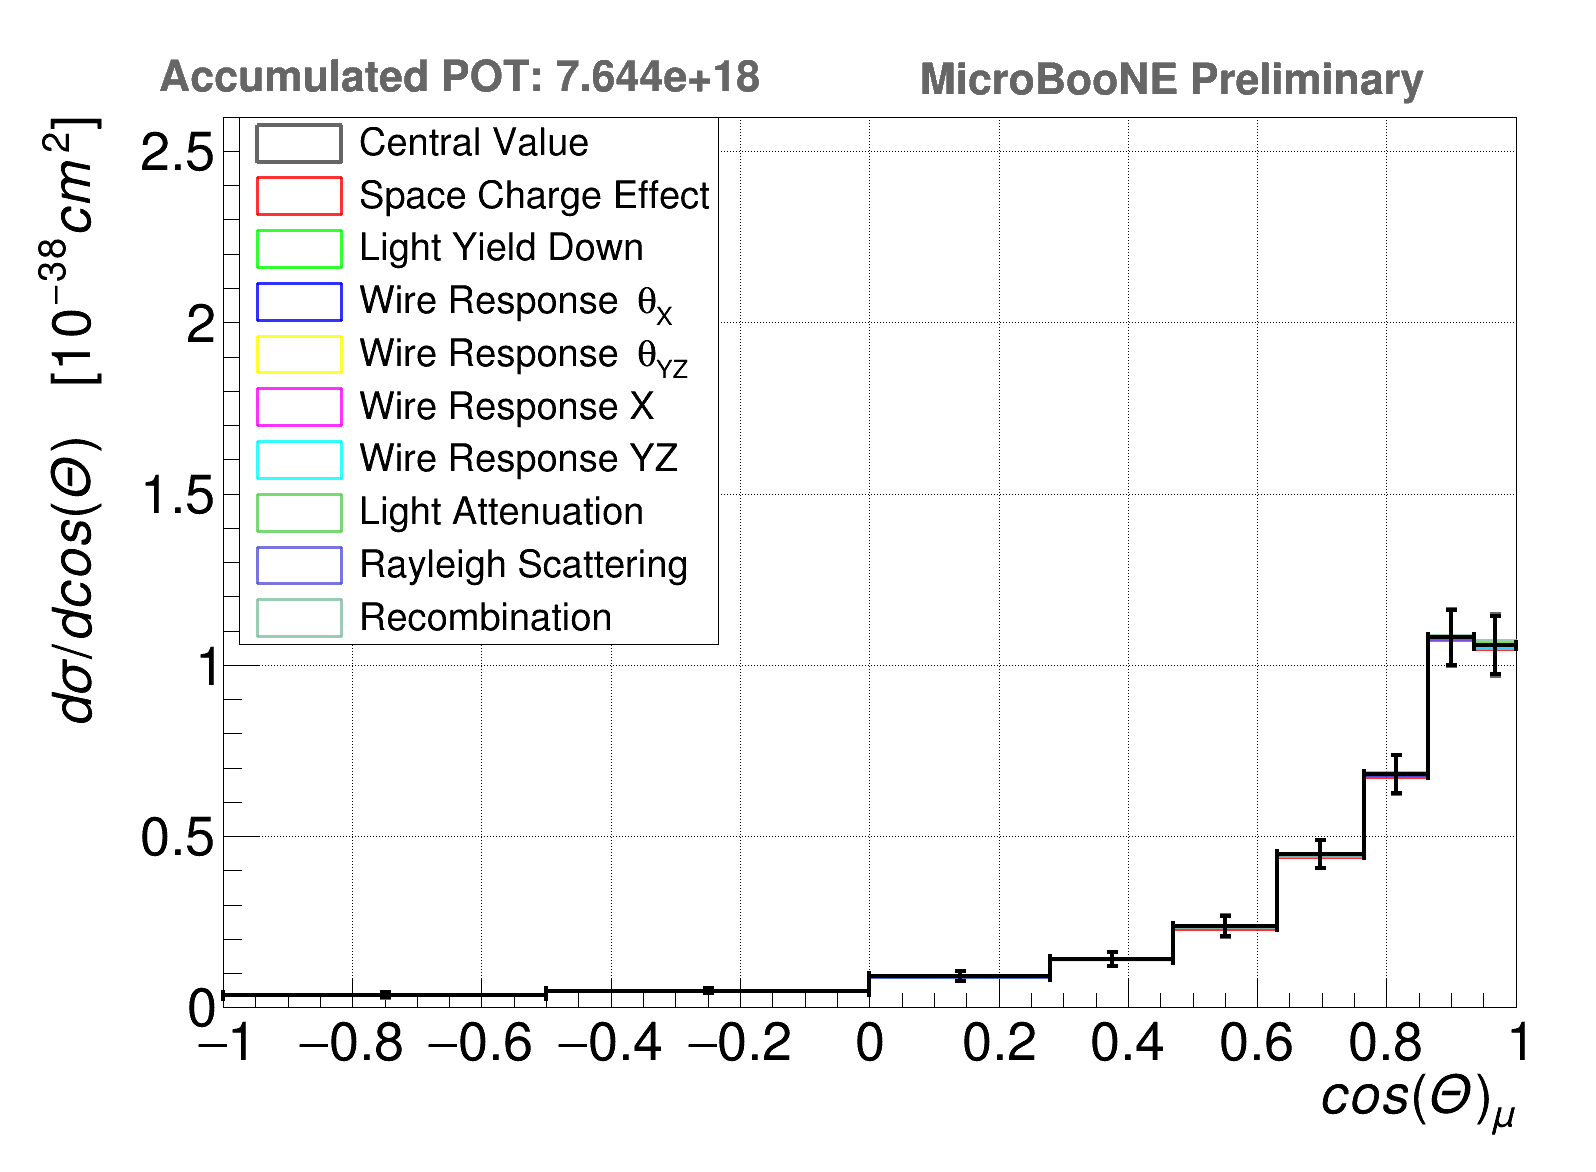

In [57]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
h_files = []
i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.45,0.45,0.9) # LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_xsec_data_theta'))
    h_files[i].Scale(1e38)
    h_files[i].SetMaximum(2.6)
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    legend.AddEntry(h_files[i],name_files[i],"f")
    h_files[i].SetYTitle("d\sigma / d cos(\Theta) \t [10^{-38} cm^{2}]")
    h_files[i].SetXTitle("cos(\Theta)_{\mu}")
    if i == 0:
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('hist')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
    i+=1
for i in range(1,h_files[0].GetNbinsX()+1):
    #print h_files[0].GetBinError(i)
    h_files[0].SetBinError(i,math.sqrt(math.pow(h_files[0].GetBinError(i),2)+h_covariance.GetBinContent(i,i)*1e76))
    #h_files[0].SetBinError(i,h_files[0].GetBinError(i)+math.sqrt(h_covariance.GetBinContent(i,i))*1e38)
h_files[0].SetLineColor(ROOT.kGray+2)
h_files[0].Draw("E1 same")
h_stat.SetLineColor(ROOT.kBlack)
h_stat.SetMarkerSize(0.9)
h_stat.Draw('hist E1 same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
del h_files[:]

c1.SaveAs(outputdir_png + "h_xsec_detsys_theta_all_wError.png")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_theta_all_wError.pdf")
c1.SaveAs(outputdir_root + "h_xsec_detsys_theta_all_wError.root")

#h_files.clear()

0.00237080195473
0.00101541351083
0.00404967131244
0.00451364201388
0.0116067640813
0.0137443610323
0.0122540685581
0.0107018791477
0.0266268378019


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/png/h_xsec_detsys_theta_errdetsys_only.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/pdf/h_xsec_detsys_theta_errdetsys_only.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/root/h_xsec_detsys_theta_errdetsys_only.root has been created


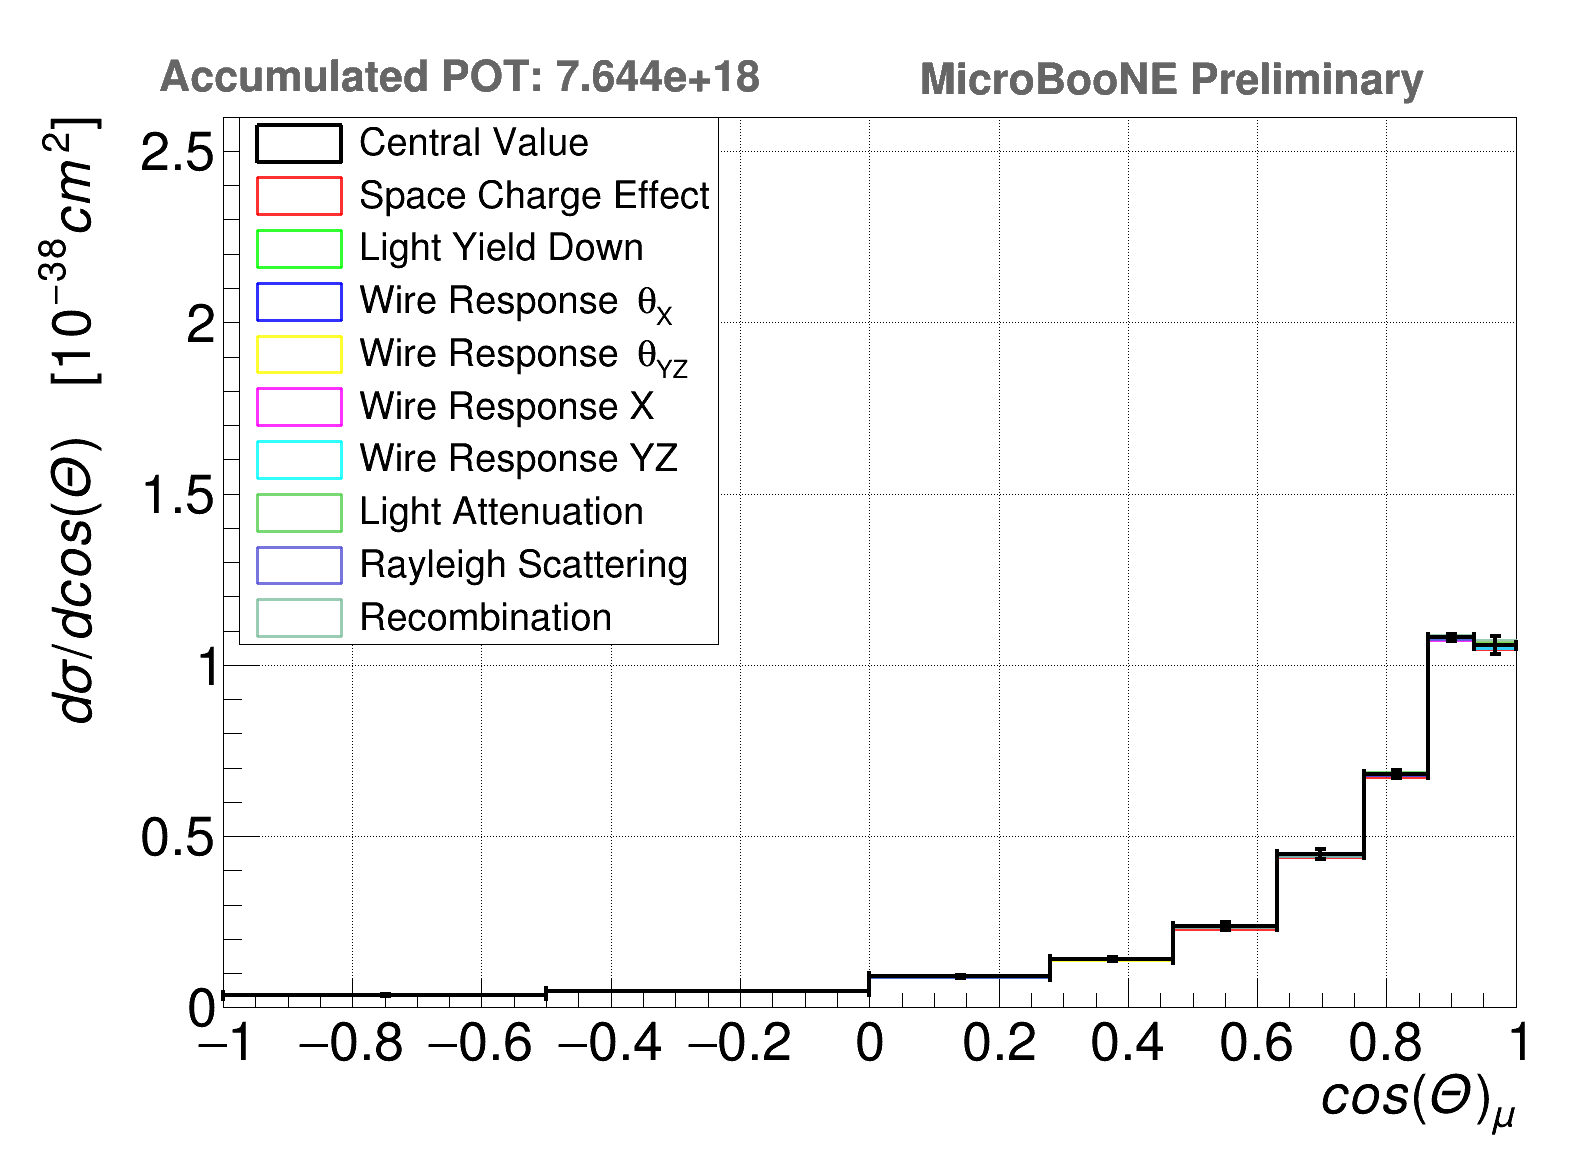

In [58]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
h_files = []
i = 0
#legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.45,0.45,0.9) # LEGEND LEFT
for x in files:
    h_files.append(x.Get('h_xsec_data_theta'))
    h_files[i].Scale(1e38)
    h_files[i].SetMaximum(2.6)
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    legend.AddEntry(h_files[i],name_files[i],"f")
    h_files[i].SetYTitle("d\sigma / d cos(\Theta) \t [10^{-38} cm^{2}]")
    h_files[i].SetXTitle("cos(\Theta)_{\mu}")
    if i == 0:
        for j in range(1,h_files[0].GetNbinsX()+1):
            h_files[0].SetBinError(j,math.sqrt(h_covariance.GetBinContent(j,j)*1e76))
            print h_files[0].GetBinError(j)
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('E1')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
    i+=1
h_files[0].SetLineColor(ROOT.kBlack)
h_files[0].Draw("E1 hist same")
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
del h_files[:]

c1.SaveAs(outputdir_png + "h_xsec_detsys_theta_errdetsys_only.png")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_theta_errdetsys_only.pdf")
c1.SaveAs(outputdir_root + "h_xsec_detsys_theta_errdetsys_only.root")

#h_files.clear()

0.00237080195473
0.00101541351083
0.00404967131244
0.00451364201388
0.0116067640813
0.0137443610323
0.0122540685581
0.0107018791477
0.0266268378019


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/png/h_xsec_detsys_theta_errdetsys_ratio.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/pdf/h_xsec_detsys_theta_errdetsys_ratio.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_t/root/h_xsec_detsys_theta_errdetsys_ratio.root has been created


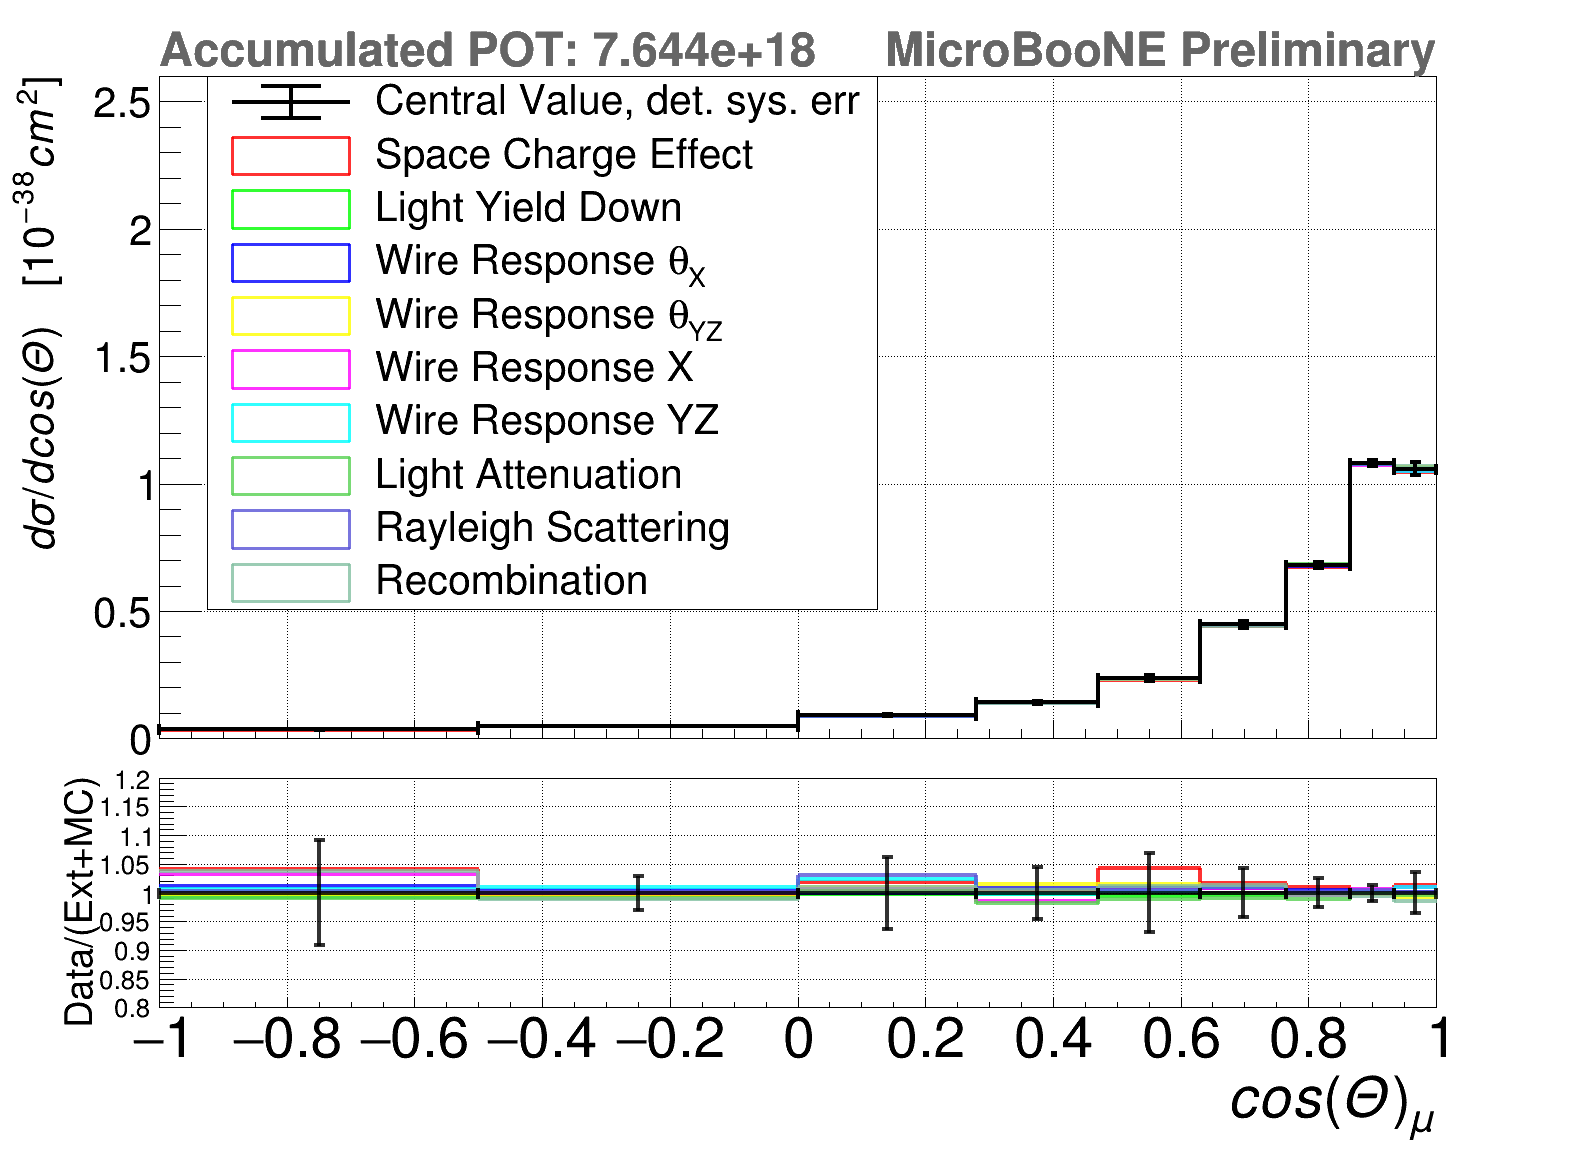

In [59]:
#files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh' ]
h_files = []
i = 0
#legend = ROOT.TLegend(0.65,0.45,0.95,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.13,0.2,0.55,0.9); #LEGEND LEFT
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)
#c1.SetFillStyle(4000);
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)

for x in files:
    h_files.append(x.Get('h_xsec_data_theta'))
    h_files[i].Scale(1e38)
    h_files[i].SetMaximum(2.6)
    h_files[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files[i].SetLineColorAlpha(30,0.8)
    if i ==0:
        legend.AddEntry(h_files[i],'Central Value, det. sys. err',"lep")
    else:
        legend.AddEntry(h_files[i],name_files[i],"f")
    h_files[i].SetYTitle("d\sigma / d cos(\Theta) \t [10^{-38} cm^{2}]")
    h_files[i].SetXTitle("cos(\Theta)_{\mu}")
    if i == 0:
        for j in range(1,h_files[0].GetNbinsX()+1):
            h_files[0].SetBinError(j,math.sqrt(h_covariance.GetBinContent(j,j)*1e76))
            print h_files[0].GetBinError(j)
        h_files[i].GetYaxis().SetLabelSize(0.06);
        h_files[i].GetYaxis().SetTitleSize(0.06);
        h_files[i].GetYaxis().SetTitleOffset(0.8);
        h_files[i].GetXaxis().SetLabelOffset(999);
        h_files[i].GetXaxis().SetTitleOffset(999);
        h_files[i].GetXaxis().SetLabelSize(0);
        h_files[i].GetXaxis().SetTitleSize(0);
        #h_covariance.SetLineColor(ROOT.kBlack)
        h_files[i].SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        h_files[i].Draw('E1')
        legend.Draw()
    else:
        h_files[i].Draw("hist same")
    i+=1
h_files[0].SetLineColor(ROOT.kBlack)
h_files[0].Draw("E1 hist same")
legend.Draw()
prelim, pot_tex = draw_adding_ratio()
prelim.Draw()
pot_tex.Draw()

c1.cd()
h_files[0].GetXaxis().SetLabelOffset(0);
h_files[0].GetXaxis().SetTitleOffset(0);
#h_data.GetXaxis().SetLabelSize(0.06);
#pad2 = ROOT.TPad('pad2','pad2',0,0.05,1,0.33)
pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()
h_files2 = []
for i,x in enumerate(files):
    h_files2.append(h_files[0].Clone())
    h_files2[i].Divide(h_files[i])
    h_files2[i].SetLineColorAlpha(i+1,0.8)
    if (i+1)==10:
        h_files2[i].SetLineColorAlpha(30,0.8)
    if i ==0 :
        h_files2[i].SetYTitle('Data/(Ext+MC)')
        h_files2[i].GetYaxis().SetTitleSize(0.1)
        h_files2[i].GetYaxis().SetTitleOffset(0.3)
        h_files2[i].GetYaxis().SetLabelSize(0.07)

        h_files2[i].GetXaxis().SetTitleSize(0.15)
        h_files2[i].GetXaxis().SetLabelSize(0.15)
        h_files2[i].GetXaxis().SetTitleOffset(1)
        h_files2[i].SetMinimum(0.8)
        h_files2[i].SetMaximum(1.2)
        h_files2[i].Draw('hist')
    else:
        h_files2[i].Draw('hist same')

h_files2[0].Draw('E1 same')
c1.Draw()
del h_files[:]

c1.SaveAs(outputdir_png + "h_xsec_detsys_theta_errdetsys_ratio.png")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_theta_errdetsys_ratio.pdf")
c1.SaveAs(outputdir_root + "h_xsec_detsys_theta_errdetsys_ratio.root")

#h_files.clear()

In [60]:
sefsefg

NameError: name 'sefsefg' is not defined

In [ ]:
RootFile_theta.Close()

In [ ]:
# only ststematic error
h_cv.SetLineWidth(3)
h_cv.SetMaximum(1.6)
h_cv.SetYTitle("d\sigma / d p_{\mu} \t [10^{-38} cm^{2}/GeV]")
h_cv.SetXTitle("p_{\mu} [GeV]")
h_cv.Draw('HIST')
legend = ROOT.TLegend(0.55,0.45,0.9,0.9); #LEGEND RIGHT
legend.AddEntry(h_cv,'CV sys. err.',"f")
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
for para in range(num_para):
    for uni in range(1):        
        h_1d_xsec[para][uni].Draw('HIST same ')
        h_1d_xsec[para][uni].SetMaximum(1.6)
        #print h_1d_xsec[para][uni].GetBinContent(3),' - ', h_1d_bkg[para][uni].GetBinContent(3)
    legend.AddEntry(h_1d_xsec[para][uni],weight_list_flux[para],"f")
legend.Draw()
for i in range(binnum):
    h_cv.SetBinError(i+1,math.sqrt(xsec_cov_matrix[i][i])*1e38)
    print h_cv.GetBinContent(i+1), h_cv.GetBinError(i+1)
h_cv.Draw('HIST E1 same')
c1.Draw()
c1.SaveAs(outputdir_png + "h_1d_xsec_genie_other_sys.png")
c1.SaveAs(outputdir_root + "h_1d_xsec_genie_other_sys.root")
c1.SaveAs(outputdir_pdf + "h_1d_xsec_genie_other_sys.pdf")
